#DOWNLOAD THE DATASET from Drive automatiicly BY RUNNING THIS CELL

In [2]:
import gdown
import pandas as pd

# Google Drive file ID
file_id = '1R1866o1WjvzY84nOpq6tn6QXUV8SARV5'

# Construct the URL
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the file
gdown.download(url, '3_modified.csv', quiet=False)

# Load the dataset
original_Dataset = pd.read_csv('3_modified.csv')

# Check the data
original_Dataset.head()


Downloading...
From: https://drive.google.com/uc?export=download&id=1R1866o1WjvzY84nOpq6tn6QXUV8SARV5
To: /content/3_modified.csv
100%|██████████| 9.12k/9.12k [00:00<00:00, 2.23MB/s]


Unnamed: 0 Parameters Random   Plant Height (PH)  Number of Pods (NP)  \
0           0     C1S1G5      R1               50.5                130.3   
1           1     C2S3G4      R1               44.5                132.0   
2           2     C2S1G6      R1               52.2                150.0   
3           3     C1S1G1      R1               50.5                140.8   
4           4     C1S2G6      R2               49.2                175.6   

   Biological Weight (BW)  Sugars (Su)  \
0                   111.0        0.433   
1                    80.0        0.334   
2                    83.0        0.490   
3                    66.0        0.163   
4                    73.0        0.795   

   Relative Water Content in Leaves (RWCL)  ChlorophyllA663  Chlorophyllb649  \
0                                    0.732              1.4              3.1   
1                                    0.674              7.1              2.2   
2                                    0.677              1.8              1.3   
3                                    0.745              1.1              3.0   
4                                    0.725              7.5              2.1   

   Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  Leaf Area Index (LAI)  \
0                      33.2                       33.6                   0.08   
1                      38.5                       34.4                   0.09   
2                      33.6                       35.2                   0.07   
3                      33.5                       52.3                   0.09   
4                      39.6                       31.2                   0.10   

   Seed Yield per Unit Area (SYUA)  Number of Seeds per Pod (NSP)  \
0                           5567.4                           1.86   
1                           2245.5                           1.87   
2                           4326.7                           2.04   
3                           6214.5                           2.20   
4                           3897.8                           1.88   

   Protein Content (PCO)  
0                   0.82  
1                   0.13  
2                   0.15  
3                   0.14  
4                   0.60

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score
from sklearn.model_selection import ParameterGrid

# Original Dataset - had many duplicates so a modified dataset removing all duplicates was made

In [4]:
original_Dataset

Unnamed: 0 Parameters Random   Plant Height (PH)  Number of Pods (NP)  \
0             0     C1S1G5      R1               50.5                130.3   
1             1     C2S3G4      R1               44.5                132.0   
2             2     C2S1G6      R1               52.2                150.0   
3             3     C1S1G1      R1               50.5                140.8   
4             4     C1S2G6      R2               49.2                175.6   
..          ...        ...     ...                ...                  ...   
103         319     C1S2G3      R3               44.0                209.0   
104         339     C1S3G2      R2               53.3                160.0   
105         365     C2S1G5      R2               50.2                148.3   
106         367     C2S2G4      R1               52.2                156.0   
107         423     C1S1G6      R3               46.6                146.0   

     Biological Weight (BW)  Sugars (Su)  \
0                     111.0        0.433   
1                      80.0        0.334   
2                      83.0        0.490   
3                      66.0        0.163   
4                      73.0        0.795   
..                      ...          ...   
103                   132.0        0.663   
104                   130.0        0.165   
105                   151.0        1.115   
106                    66.0        0.295   
107                   112.0        0.450   

     Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0                                      0.732              1.4   
1                                      0.674              7.1   
2                                      0.677              1.8   
3                                      0.745              1.1   
4                                      0.725              7.5   
..                                       ...              ...   
103                                    0.875              9.0   
104                                    0.651              1.8   
105                                    0.683              6.1   
106                                    0.632              6.9   
107                                    0.749              1.6   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0                3.1                      33.2                       33.6   
1                2.2                      38.5                       34.4   
2                1.3                      33.6                       35.2   
3                3.0                      33.5                       52.3   
4                2.1                      39.6                       31.2   
..               ...                       ...                        ...   
103              1.3                      39.7                       31.2   
104              3.2                      33.6                       34.5   
105              1.2                      37.2                       37.2   
106              1.1                      32.3                       35.3   
107              2.0                      36.6                       32.2   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                     0.08                           5567.4   
1                     0.09                           2245.5   
2                     0.07                           4326.7   
3                     0.09                           6214.5   
4                     0.10                           3897.8   
..                     ...                              ...   
103                   0.06                           4472.7   
104                   0.10                           5643.7   
105                   0.10                           3067.1   
106                   0.09                           3112.2   
107                   0.07                           3116.3   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)  
0               

In [5]:
original_Dataset.duplicated().sum()

np.int64(0)

In [6]:
original_Dataset.isnull().sum()

Unnamed: 0                                 0
Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64

In [7]:
data=pd.read_csv('3_modified.csv')

In [8]:
data

Unnamed: 0 Parameters Random   Plant Height (PH)  Number of Pods (NP)  \
0             0     C1S1G5      R1               50.5                130.3   
1             1     C2S3G4      R1               44.5                132.0   
2             2     C2S1G6      R1               52.2                150.0   
3             3     C1S1G1      R1               50.5                140.8   
4             4     C1S2G6      R2               49.2                175.6   
..          ...        ...     ...                ...                  ...   
103         319     C1S2G3      R3               44.0                209.0   
104         339     C1S3G2      R2               53.3                160.0   
105         365     C2S1G5      R2               50.2                148.3   
106         367     C2S2G4      R1               52.2                156.0   
107         423     C1S1G6      R3               46.6                146.0   

     Biological Weight (BW)  Sugars (Su)  \
0                     111.0        0.433   
1                      80.0        0.334   
2                      83.0        0.490   
3                      66.0        0.163   
4                      73.0        0.795   
..                      ...          ...   
103                   132.0        0.663   
104                   130.0        0.165   
105                   151.0        1.115   
106                    66.0        0.295   
107                   112.0        0.450   

     Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0                                      0.732              1.4   
1                                      0.674              7.1   
2                                      0.677              1.8   
3                                      0.745              1.1   
4                                      0.725              7.5   
..                                       ...              ...   
103                                    0.875              9.0   
104                                    0.651              1.8   
105                                    0.683              6.1   
106                                    0.632              6.9   
107                                    0.749              1.6   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0                3.1                      33.2                       33.6   
1                2.2                      38.5                       34.4   
2                1.3                      33.6                       35.2   
3                3.0                      33.5                       52.3   
4                2.1                      39.6                       31.2   
..               ...                       ...                        ...   
103              1.3                      39.7                       31.2   
104              3.2                      33.6                       34.5   
105              1.2                      37.2                       37.2   
106              1.1                      32.3                       35.3   
107              2.0                      36.6                       32.2   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                     0.08                           5567.4   
1                     0.09                           2245.5   
2                     0.07                           4326.7   
3                     0.09                           6214.5   
4                     0.10                           3897.8   
..                     ...                              ...   
103                   0.06                           4472.7   
104                   0.10                           5643.7   
105                   0.10                           3067.1   
106                   0.09                           3112.2   
107                   0.07                           3116.3   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)  
0               

In [9]:
data=data.drop(data.columns[0],axis=1)

In [10]:
data

Parameters Random   Plant Height (PH)  Number of Pods (NP)  \
0       C1S1G5      R1               50.5                130.3   
1       C2S3G4      R1               44.5                132.0   
2       C2S1G6      R1               52.2                150.0   
3       C1S1G1      R1               50.5                140.8   
4       C1S2G6      R2               49.2                175.6   
..         ...     ...                ...                  ...   
103     C1S2G3      R3               44.0                209.0   
104     C1S3G2      R2               53.3                160.0   
105     C2S1G5      R2               50.2                148.3   
106     C2S2G4      R1               52.2                156.0   
107     C1S1G6      R3               46.6                146.0   

     Biological Weight (BW)  Sugars (Su)  \
0                     111.0        0.433   
1                      80.0        0.334   
2                      83.0        0.490   
3                      66.0        0.163   
4                      73.0        0.795   
..                      ...          ...   
103                   132.0        0.663   
104                   130.0        0.165   
105                   151.0        1.115   
106                    66.0        0.295   
107                   112.0        0.450   

     Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0                                      0.732              1.4   
1                                      0.674              7.1   
2                                      0.677              1.8   
3                                      0.745              1.1   
4                                      0.725              7.5   
..                                       ...              ...   
103                                    0.875              9.0   
104                                    0.651              1.8   
105                                    0.683              6.1   
106                                    0.632              6.9   
107                                    0.749              1.6   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0                3.1                      33.2                       33.6   
1                2.2                      38.5                       34.4   
2                1.3                      33.6                       35.2   
3                3.0                      33.5                       52.3   
4                2.1                      39.6                       31.2   
..               ...                       ...                        ...   
103              1.3                      39.7                       31.2   
104              3.2                      33.6                       34.5   
105              1.2                      37.2                       37.2   
106              1.1                      32.3                       35.3   
107              2.0                      36.6                       32.2   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                     0.08                           5567.4   
1                     0.09                           2245.5   
2                     0.07                           4326.7   
3                     0.09                           6214.5   
4                     0.10                           3897.8   
..                     ...                              ...   
103                   0.06                           4472.7   
104                   0.10                           5643.7   
105                   0.10                           3067.1   
106                   0.09                           3112.2   
107                   0.07                           3116.3   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)  
0                             1.86                   0.82  
1                             1.87                   0.13  
2                             2.04     

# Ordinal Encoding of Parameters column to form 3 new columns C, G and S respectively.

In [11]:
C=[]
S=[]
G=[]
for i in range(len(data["Parameters"])):
    C.append(int(data["Parameters"][i].split("S")[0][-1]))
    S.append(int(data["Parameters"][i].split("S")[1][0]))
    G.append(int(data["Parameters"][i].split("G")[1][0]))
data["C"]=C
data["S"]=S
data["G"]=G

## Dropping the first 2 columns because of them not being relevant

In [12]:
params=data.columns[2:]
data_v1=data[params]

In [13]:
data_v1

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
0                 50.5                130.3                   111.0   
1                 44.5                132.0                    80.0   
2                 52.2                150.0                    83.0   
3                 50.5                140.8                    66.0   
4                 49.2                175.6                    73.0   
..                 ...                  ...                     ...   
103               44.0                209.0                   132.0   
104               53.3                160.0                   130.0   
105               50.2                148.3                   151.0   
106               52.2                156.0                    66.0   
107               46.6                146.0                   112.0   

     Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0          0.433                                    0.732              1.4   
1          0.334                                    0.674              7.1   
2          0.490                                    0.677              1.8   
3          0.163                                    0.745              1.1   
4          0.795                                    0.725              7.5   
..           ...                                      ...              ...   
103        0.663                                    0.875              9.0   
104        0.165                                    0.651              1.8   
105        1.115                                    0.683              6.1   
106        0.295                                    0.632              6.9   
107        0.450                                    0.749              1.6   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0                3.1                      33.2                       33.6   
1                2.2                      38.5                       34.4   
2                1.3                      33.6                       35.2   
3                3.0                      33.5                       52.3   
4                2.1                      39.6                       31.2   
..               ...                       ...                        ...   
103              1.3                      39.7                       31.2   
104              3.2                      33.6                       34.5   
105              1.2                      37.2                       37.2   
106              1.1                      32.3                       35.3   
107              2.0                      36.6                       32.2   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                     0.08                           5567.4   
1                     0.09                           2245.5   
2                     0.07                           4326.7   
3                     0.09                           6214.5   
4                     0.10                           3897.8   
..                     ...                              ...   
103                   0.06                           4472.7   
104                   0.10                           5643.7   
105                   0.10                           3067.1   
106                   0.09                           3112.2   
107                   0.07                           3116.3   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)  C  S  G  
0                             1.86                   0.82  1  1  5  
1                             1.87                   0.13  2  3  4  
2                             2.04                   0.15  2  1  6  
3                             2.20                   0.14  1  1  1  
4                             1.88                   0.60  1  2  6  
..                             ...                    ... .. .. ..  
103                           2.60                

In [14]:
data_v1.shape

(108, 16)

In [15]:
data_v1.duplicated().sum()

np.int64(0)

# **EDA** on dataset

In [16]:
data_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Plant Height (PH)                        108 non-null    float64
 1   Number of Pods (NP)                      108 non-null    float64
 2   Biological Weight (BW)                   108 non-null    float64
 3   Sugars (Su)                              108 non-null    float64
 4   Relative Water Content in Leaves (RWCL)  108 non-null    float64
 5   ChlorophyllA663                          108 non-null    float64
 6   Chlorophyllb649                          108 non-null    float64
 7   Protein Percentage (PPE)                 108 non-null    float64
 8   Weight of 300 Seeds (W3S)                108 non-null    float64
 9   Leaf Area Index (LAI)                    108 non-null    float64
 10  Seed Yield per Unit Area (SYUA)          108 non-n

In [17]:
data_v1.isnull().sum().sum()

np.int64(0)

In [18]:
data_v1.describe()

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
count         108.000000           108.000000              108.000000   
mean           49.959259           144.936111              114.527778   
std             3.066431            20.113791               49.150248   
min            40.400000            75.000000               32.000000   
25%            49.200000           131.150000               79.750000   
50%            50.300000           147.000000              101.000000   
75%            52.000000           158.000000              132.250000   
max            55.700000           218.000000              236.000000   

       Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
count   108.000000                               108.000000       108.000000   
mean      0.477546                                 0.673630         3.937963   
std       0.237392                                 0.084902         2.859701   
min       0.161000                                 0.434000         1.000000   
25%       0.294750                                 0.632750         1.475000   
50%       0.464500                                 0.677000         2.350000   
75%       0.612250                                 0.722250         6.750000   
max       1.115000                                 0.875000        10.200000   

       Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
count       108.000000                108.000000                 108.000000   
mean          2.399074                 36.042593                  35.349074   
std           1.192931                  2.428499                   5.022929   
min           1.100000                 31.100000                  26.400000   
25%           1.300000                 33.600000                  32.200000   
50%           2.200000                 36.600000                  34.500000   
75%           3.100000                 38.000000                  37.225000   
max           7.800000                 39.900000                  53.900000   

       Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
count             108.000000                       108.000000   
mean                0.072130                      4388.414815   
std                 0.022384                      1257.256726   
min                 0.020000                      2127.500000   
25%                 0.057500                      3344.525000   
50%                 0.080000                      4312.700000   
75%                 0.090000                      5220.525000   
max                 0.100000                      7841.500000   

       Number of Seeds per Pod (NSP)  Protein Content (PCO)           C  \
count                     108.000000             108.000000  108.000000   
mean                        2.020093               0.507593    1.500000   
std                         0.247040               0.288871    0.502331   
min                         1.400000               0.120000    1.000000   
25%                         1.850000               0.327500    1.000000   
50%                         2.050000               0.460000    1.500000   
75%                         2.200000               0.600000    2.000000   
max                         2.600000               1.800000    2.000000   

                S           G  
count  108.000000  108.000000  
mean     1.972222    3.500000  
std      0.836753    1.715787  
min      1.000000    1.000000  
25%      1.000000    2.000000  
50%      2.000000    3.500000  
75%      3.000000    5.000000  
max      3.000000    6.000000

# Standardising values

In [19]:
standard_scaler=StandardScaler()
columns=list(data_v1.columns)
# columns.remove("C")
# columns.remove("G")
# columns.remove("S")
data_v2=pd.DataFrame(standard_scaler.fit_transform(data_v1[columns]),columns=columns).astype('float64')
# data_v2["C"]=data_v1["C"]
# data_v2["G"]=data_v1["G"]
# data_v2["S"]=data_v1["S"]


In [20]:
data_v2

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
0             0.177164            -0.731058               -0.072110   
1            -1.788630            -0.646145               -0.705770   
2             0.734139             0.252936               -0.644448   
3             0.177164            -0.206594               -0.991938   
4            -0.248758             1.531628               -0.848854   
..                 ...                  ...                     ...   
103          -1.952446             3.199922                0.357143   
104           1.094535             0.752425                0.316262   
105           0.078874             0.168023                0.745515   
106           0.734139             0.552629               -0.991938   
107          -1.100602             0.053140               -0.051669   

     Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0      -0.188523                                 0.690705        -0.891630   
1      -0.607499                                 0.004383         1.110878   
2       0.052705                                 0.039882        -0.751103   
3      -1.331185                                 0.844535        -0.997025   
4       1.343489                                 0.607873         1.251405   
..           ...                                      ...              ...   
103     0.784855                                 2.382843         1.778380   
104    -1.322721                                -0.267779        -0.751103   
105     2.697754                                 0.110881         0.759561   
106    -0.772550                                -0.492609         1.040614   
107    -0.116578                                 0.891868        -0.821366   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0           0.590306                 -1.175971                  -0.349841   
1          -0.167656                  1.016621                  -0.189829   
2          -0.925618                 -1.010492                  -0.029817   
3           0.506088                 -1.051862                   3.390443   
4          -0.251874                  1.471688                  -0.829878   
..               ...                       ...                        ...   
103        -0.925618                  1.513057                  -0.829878   
104         0.674524                 -1.010492                  -0.169828   
105        -1.009836                  0.478816                   0.370213   
106        -1.094054                 -1.548298                  -0.009816   
107        -0.336092                  0.230598                  -0.629863   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                 0.353251                         0.942116   
1                 0.802088                        -1.712383   
2                -0.095586                        -0.049316   
3                 0.802088                         1.459208   
4                 1.250924                        -0.392046   
..                     ...                              ...   
103              -0.544422                         0.067351   
104               1.250924                         1.003087   
105               1.250924                        -1.055850   
106               0.802088                        -1.019811   
107              -0.095586                        -1.016535   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)    C         S  \
0                        -0.651063               1.086519 -1.0 -1.167315   
1                        -0.610395              -1.313226  1.0  1.234019   
2                         0.080959              -1.243668  1.0 -1.167315   
3                         0.731646              -1.278447 -1.0 -1.167315   
4                        -0.569727               0.321383 -1.0  0.033352   
..                             ...                    ...  ...       ...   
1

# **Correlation analysis**

<Axes: >

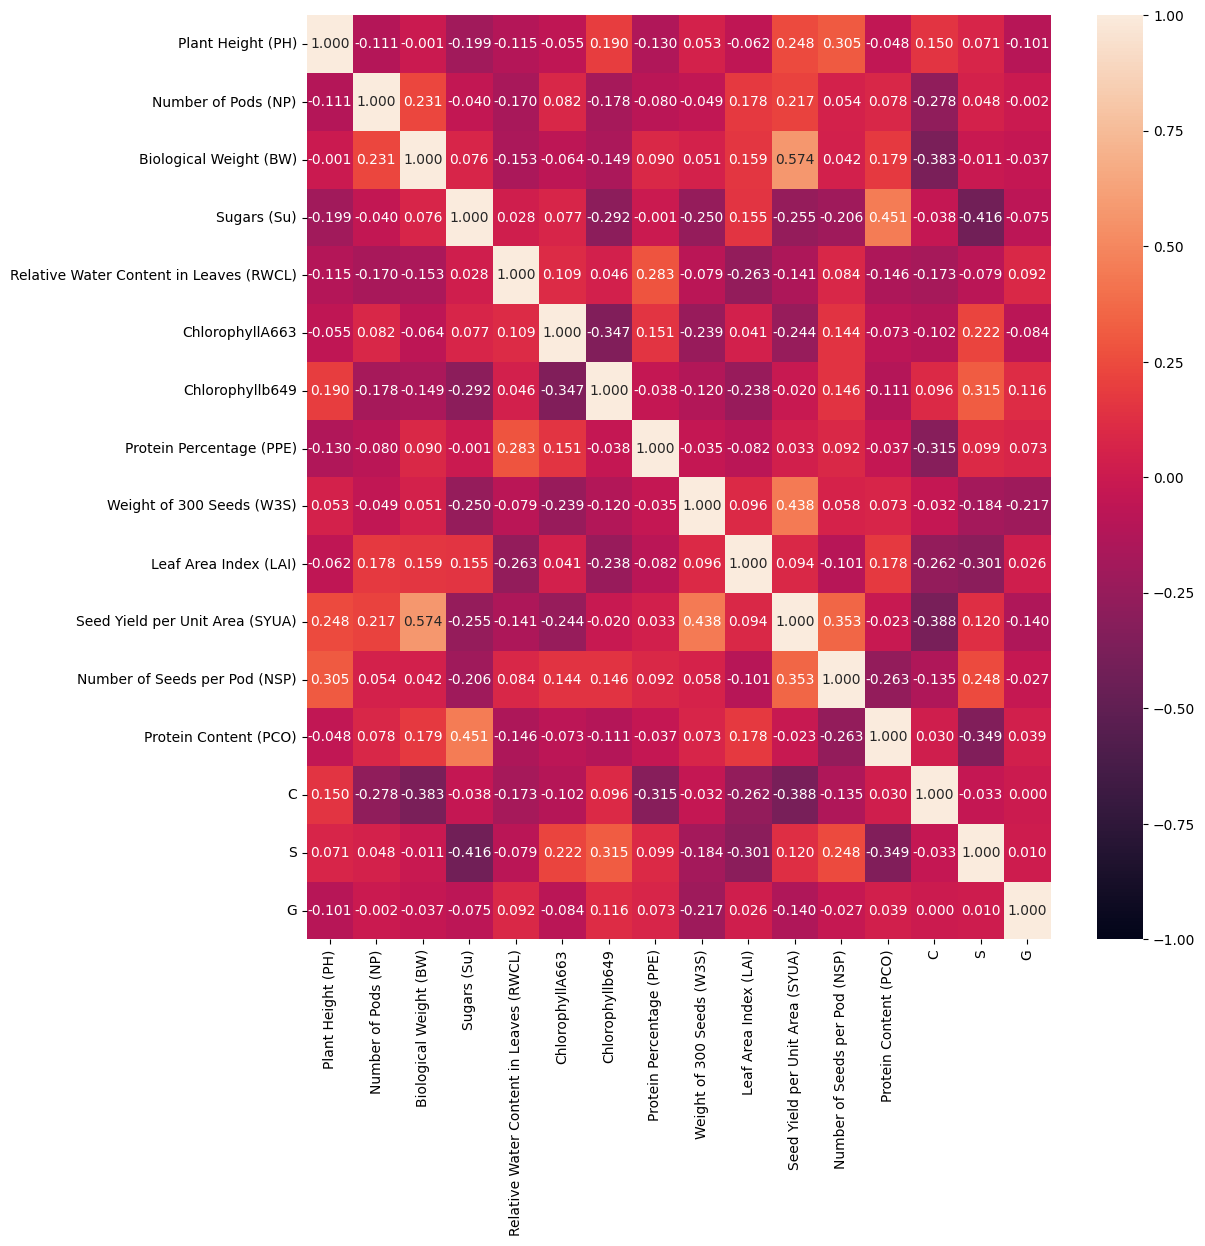

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data_v1.corr(),annot=True,fmt=".3f",vmax=1,vmin=-1)

<Figure size 1200x1200 with 0 Axes>

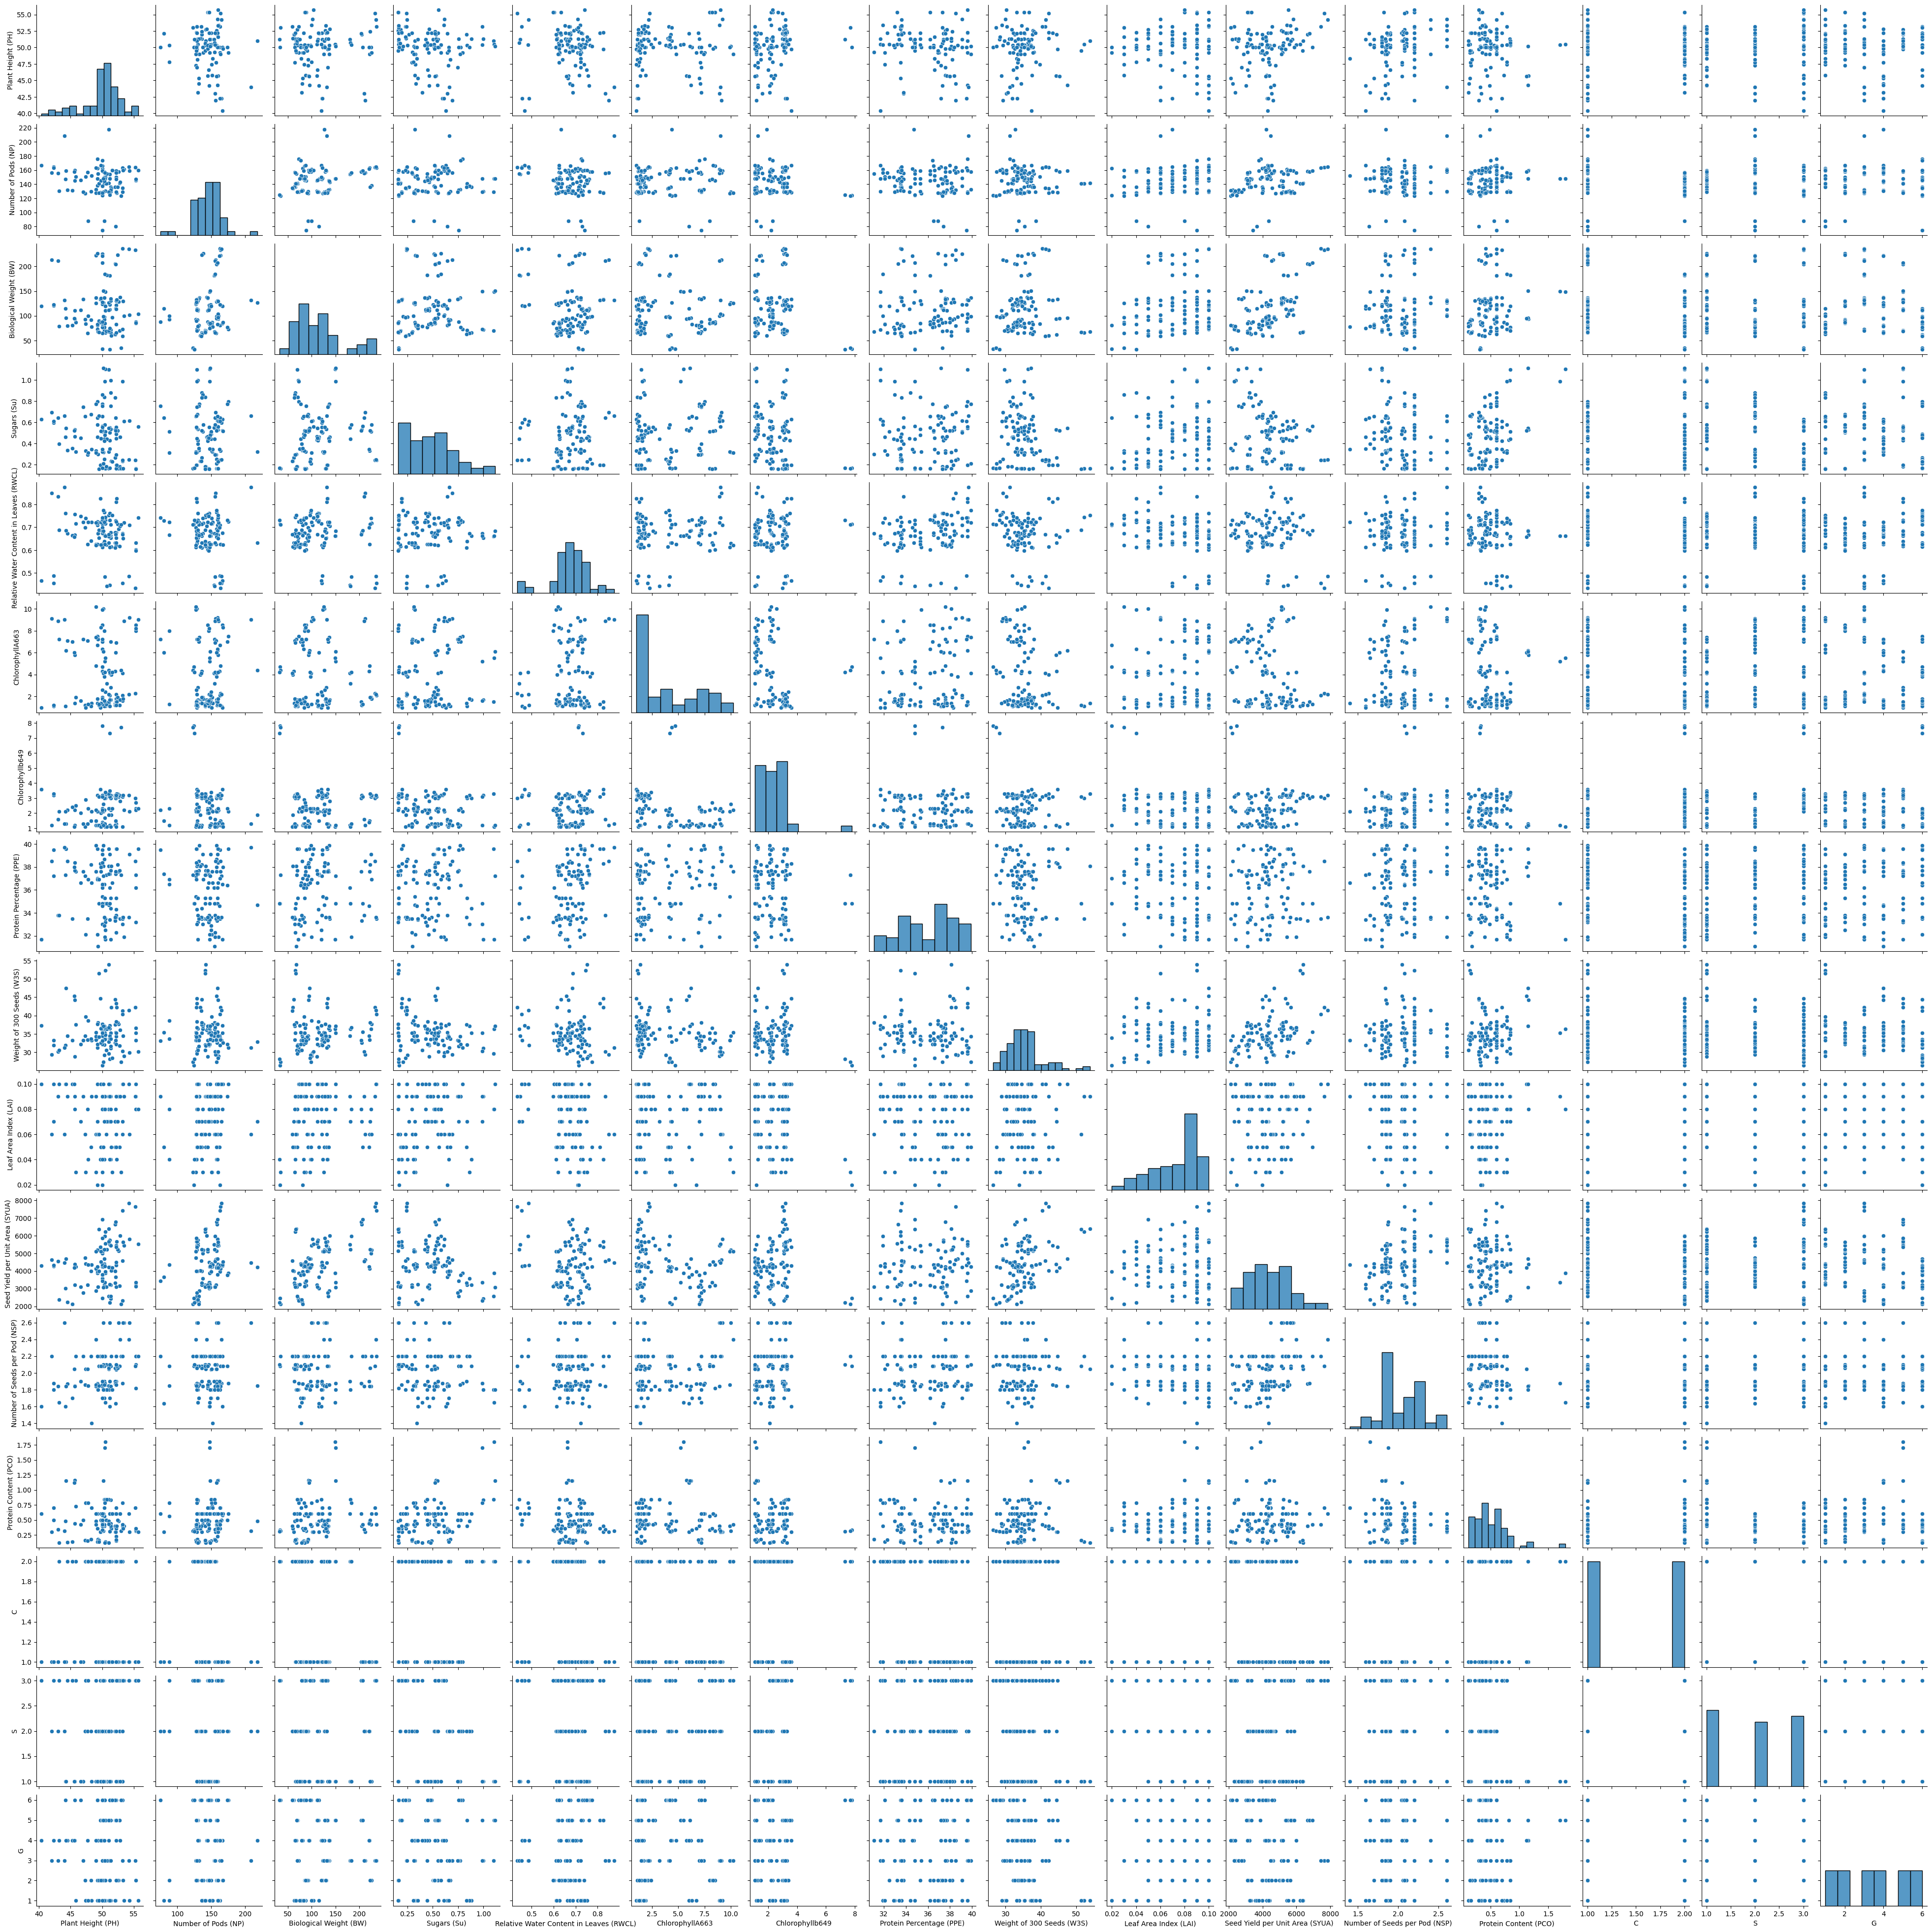

In [ ]:
plt.figure(figsize=(12,12))
sns.pairplot(data_v1)
plt.show()

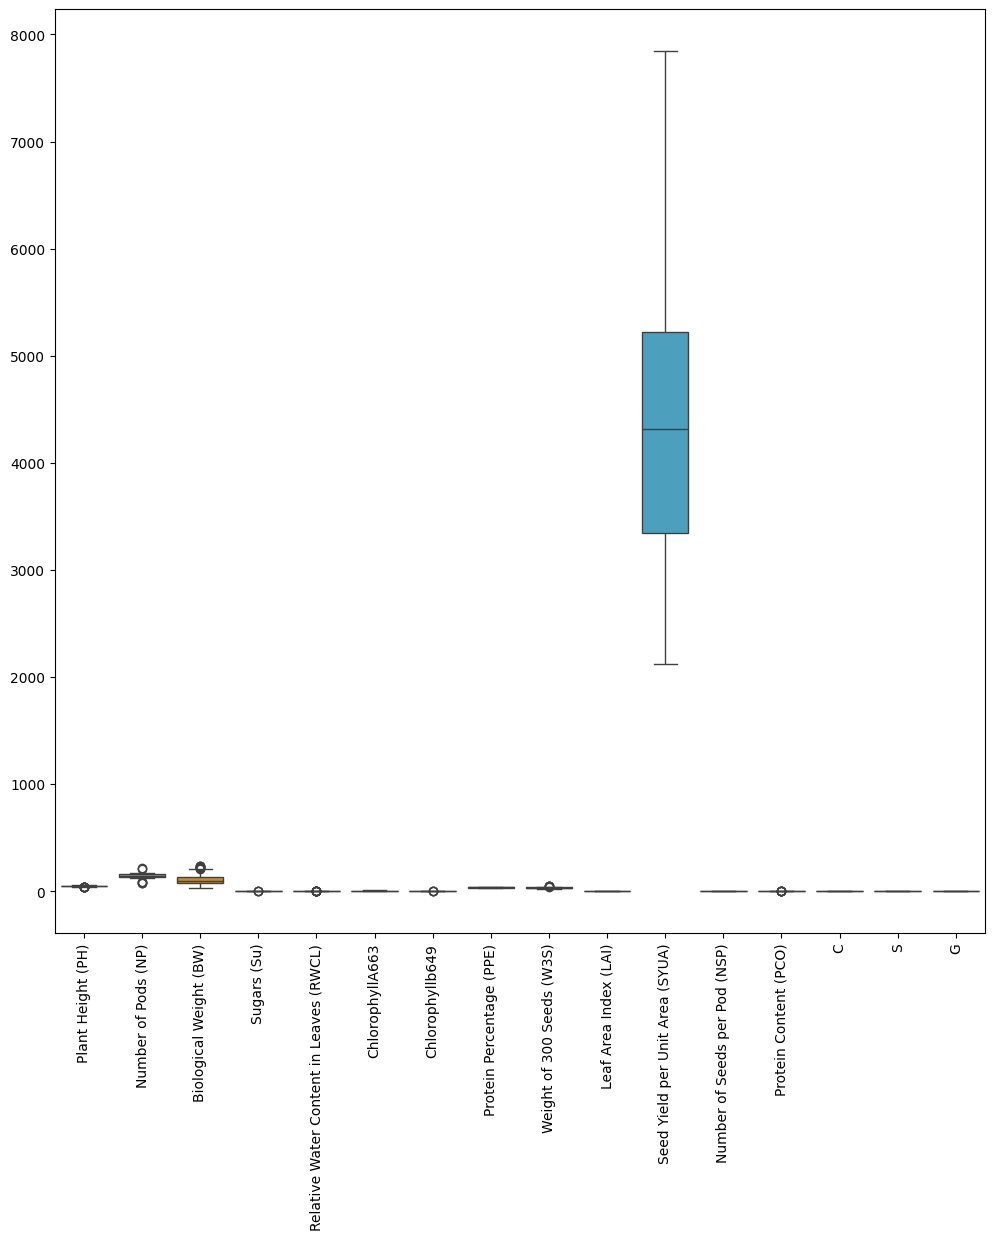

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data_v1)
plt.xticks(rotation=90)
plt.show()

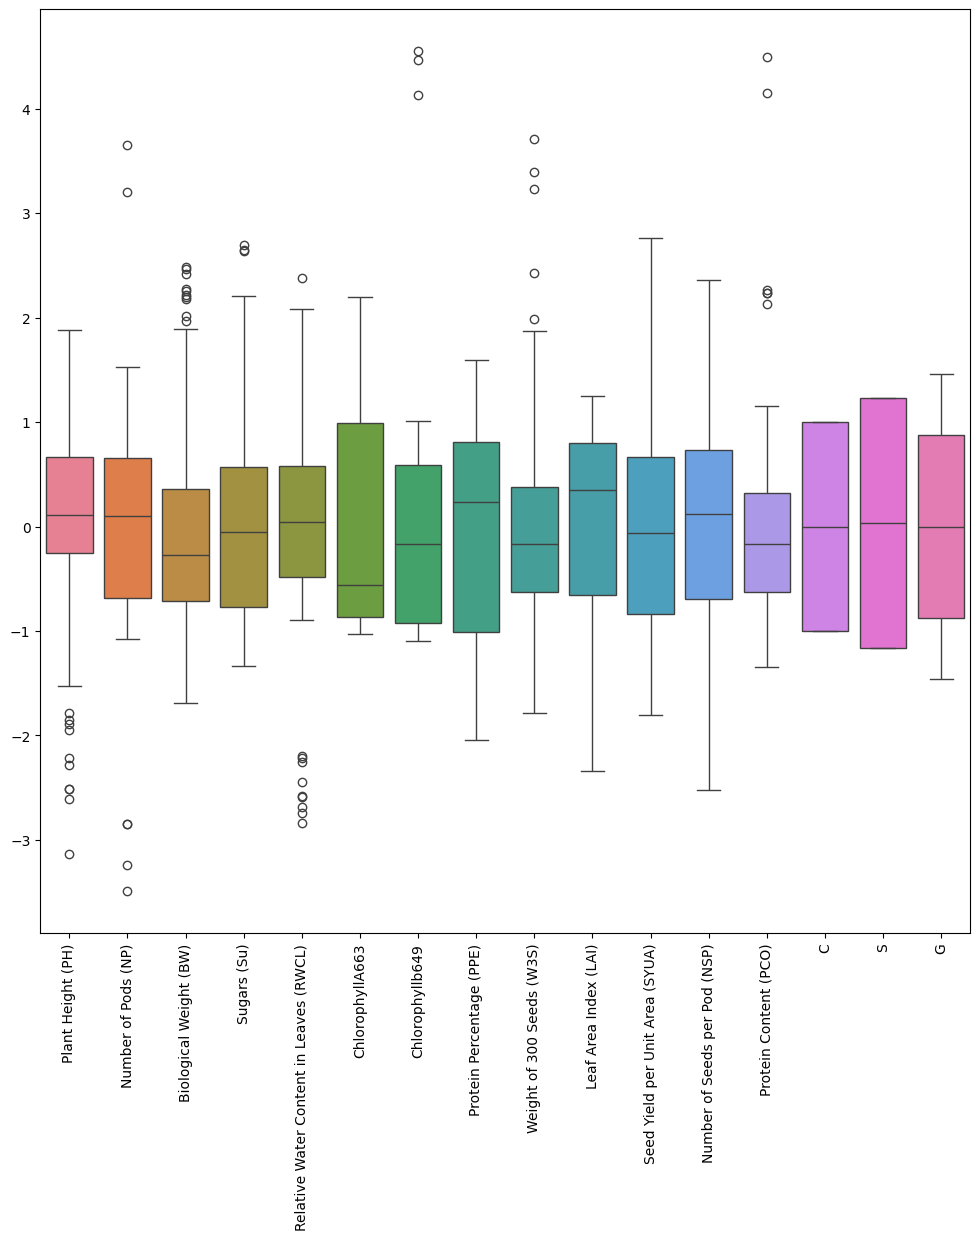

In [ ]:
plt.figure(figsize=(12,12))
sns.boxplot(data=data_v2)
plt.xticks(rotation=90)
plt.show()

#Since there are very less data points(108), we won't be removing OUTLIERS but we can try removing them and doing all the further analysis and training at a later stage again

<BarContainer object of 108 artists>

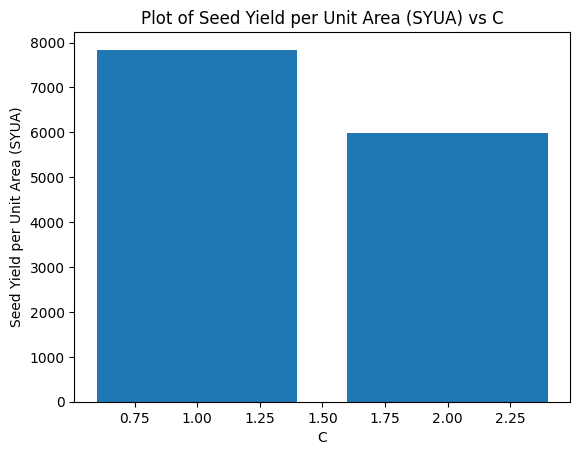

In [ ]:
plt.title("Plot of Seed Yield per Unit Area (SYUA) vs C")
plt.xlabel("C")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.bar(data_v1["C"],data_v1["Seed Yield per Unit Area (SYUA)"])

<BarContainer object of 108 artists>

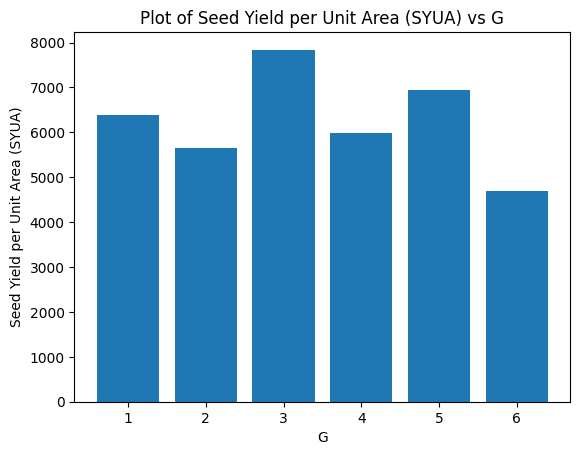

In [ ]:
plt.title("Plot of Seed Yield per Unit Area (SYUA) vs G")
plt.xlabel("G")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.bar(data_v1["G"],data_v1["Seed Yield per Unit Area (SYUA)"])

<BarContainer object of 108 artists>

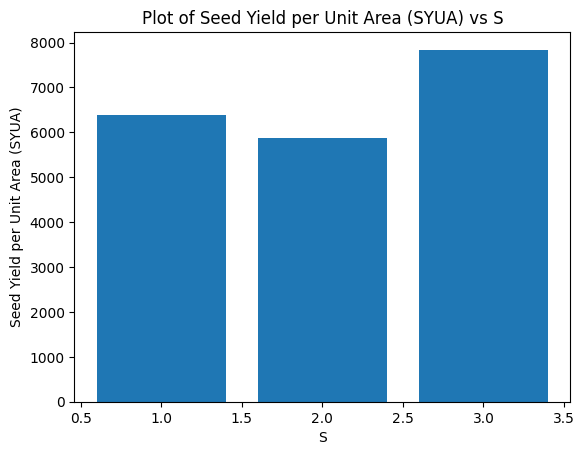

In [ ]:
plt.title("Plot of Seed Yield per Unit Area (SYUA) vs S")
plt.xlabel("S")
plt.ylabel("Seed Yield per Unit Area (SYUA)")
plt.bar(data_v1["S"],data_v1["Seed Yield per Unit Area (SYUA)"])

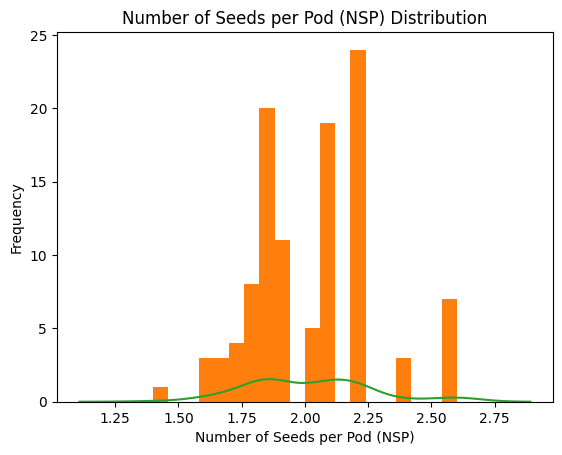

In [ ]:
data_v1['Number of Seeds per Pod (NSP)'].plot(kind='hist', bins=20, title='Number of Seeds per Pod (NSP) Distribution')
plt.hist(data_v1['Number of Seeds per Pod (NSP)'],bins=20)
sns.kdeplot(data_v1['Number of Seeds per Pod (NSP)'])
plt.xlabel('Number of Seeds per Pod (NSP)')
plt.show()

# **Mutual Information Regression between plausible target variables and other variables**

Plausible target variables are :


*   Seed Yield Per Unit Area
*   Number of Seeds per pod
*   Sugars
*   Protein Percentage







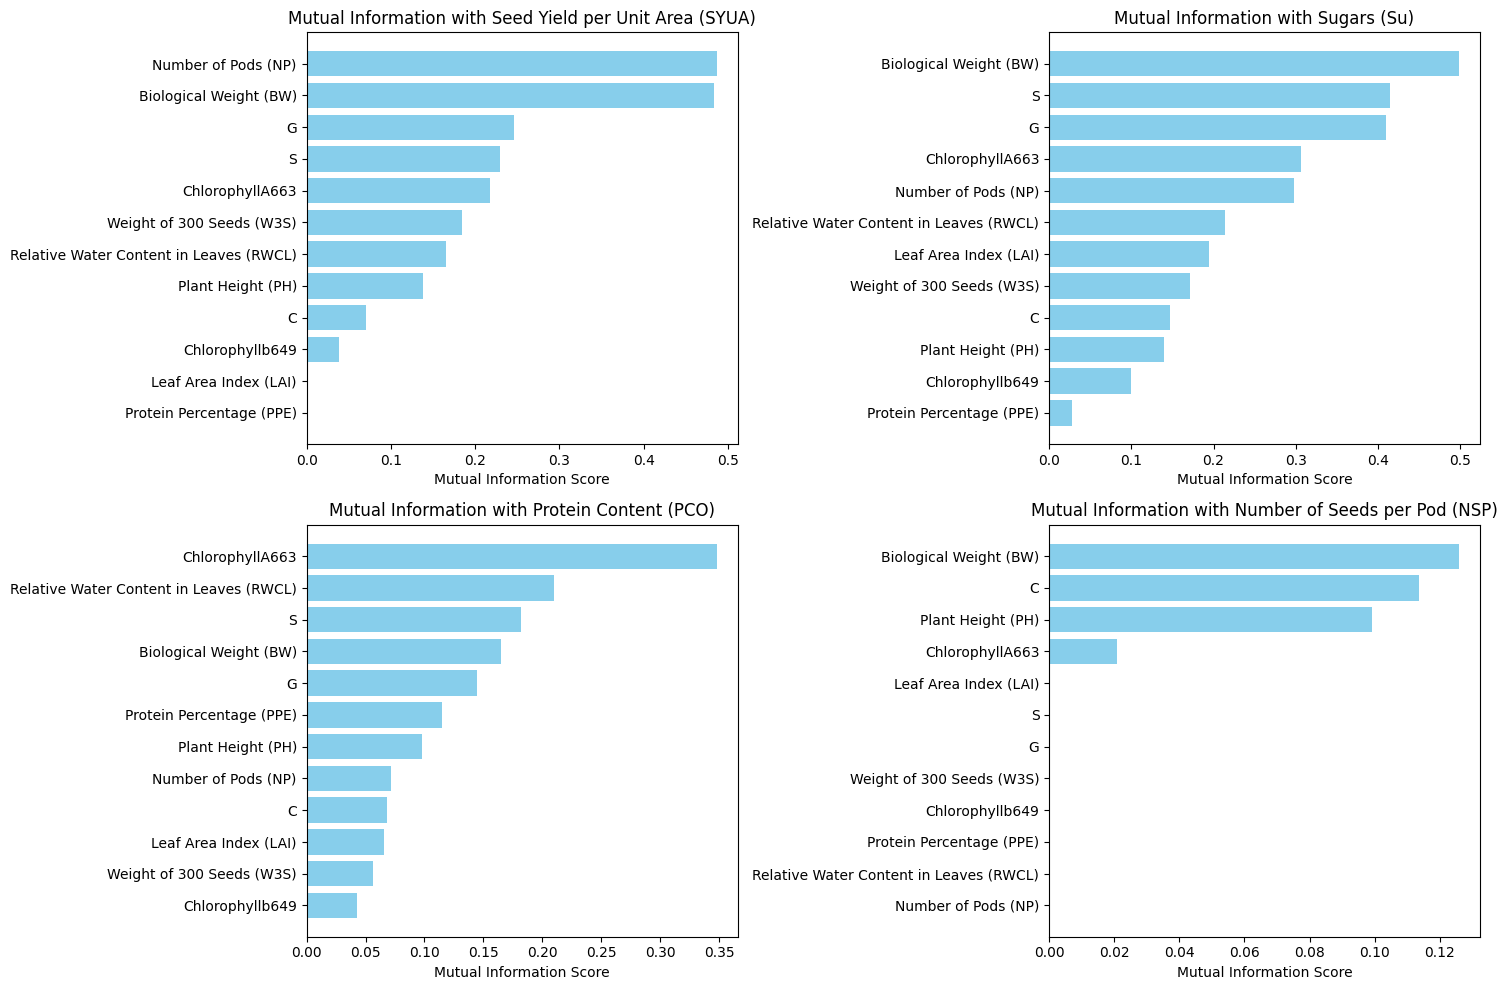

In [ ]:
target_vars = ["Seed Yield per Unit Area (SYUA)", "Sugars (Su)", "Protein Content (PCO)", "Number of Seeds per Pod (NSP)"]
target_frame=data_v2[target_vars]
features = data_v2.drop(columns=target_vars)

# Compute Mutual Information for each target variable
mi_scores = {}
for target in target_vars:
    mi = mutual_info_regression(features, data_v2[target], random_state=42)
    mi_scores[target] = mi

# Plot bar graphs
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, target in enumerate(target_vars):
    sorted_indices = np.argsort(mi_scores[target])[::-1]
    sorted_features = features.columns[sorted_indices]
    sorted_mi = np.array(mi_scores[target])[sorted_indices]

    axes[i].barh(sorted_features, sorted_mi, color='skyblue')
    axes[i].set_title(f"Mutual Information with {target}")
    axes[i].set_xlabel("Mutual Information Score")
    axes[i].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
data_v2.columns

Index(['Plant Height (PH)', 'Number of Pods (NP)', 'Biological Weight (BW)',
       'Sugars (Su)', 'Relative Water Content in Leaves (RWCL)',
       'ChlorophyllA663', 'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)', 'C', 'S', 'G'],
      dtype='object')

# **Clustering Techniques**

## Clustering is performed on the whole dataset to identify which set of inputs and outputs will give the maximum yield

## Clustering is also performed on the output parameters to identify which set of phenotypic traits can be obtained from the seeds - qualitative clustering of phenotypes

# Using the KMeans Clustering Algorithm to cluster data on the PCA(2) dataset

In [34]:
pca=PCA(n_components=2)
params=data_v2.columns
pca_data=pd.DataFrame(pca.fit_transform(data_v2[params]),columns=["PC1","PC2"])
pca_data

PC1       PC2
0    0.732307  0.278651
1   -0.378193 -2.023648
2    0.013469 -0.713336
3   -1.152673  2.109208
4    1.537550 -0.333274
..        ...       ...
103  0.169585  1.001822
104 -2.102698  2.395347
105  3.787550 -0.741049
106 -0.322685 -0.863335
107  0.921485 -0.864294

[108 rows x 2 columns]

## Using Silhoutte score & Elbow score using inertia as a means for checking effectiveness of clustering algorithm

In [35]:
params={'n_clusters':range(2,20)}
best_score=-1
best_k=1
best_model=''

inertia_values=[]

divide=int(len(pca_data)*0.8)
pca_data_train,pca_data_test=pd.DataFrame(pca_data[:divide]),pd.DataFrame(pca_data[divide:])

for parameter in ParameterGrid(params):
  kmeans_model=KMeans(n_clusters=parameter['n_clusters'])
  kmeans_model.fit(pca_data_train)
  predicted_val=kmeans_model.predict(pca_data_test)
  score=silhouette_score(pca_data_test,predicted_val)
  inertia_values.append(kmeans_model.inertia_)

  # if(score>best_score):
  #   best_k=parameter['n_clusters']
  #   best_score=score
  #   best_model=kmeans_model
  print(parameter,score)



{'n_clusters': 2} 0.1945086352878425
{'n_clusters': 3} 0.23294614597012853
{'n_clusters': 4} 0.3328226689981087
{'n_clusters': 5} 0.33704655322922955
{'n_clusters': 6} 0.33499553466253795
{'n_clusters': 7} 0.33909291102425293
{'n_clusters': 8} 0.31746167637286615
{'n_clusters': 9} 0.215421711985019
{'n_clusters': 10} 0.2808954333335842
{'n_clusters': 11} 0.34715419425381194
{'n_clusters': 12} 0.3314083857952086
{'n_clusters': 13} 0.3165504829388395
{'n_clusters': 14} 0.2927441494433047
{'n_clusters': 15} 0.37525118737424923
{'n_clusters': 16} 0.15668339427970732
{'n_clusters': 17} 0.22479679578636877
{'n_clusters': 18} 0.2257967033197559
{'n_clusters': 19} 0.33723799642834934


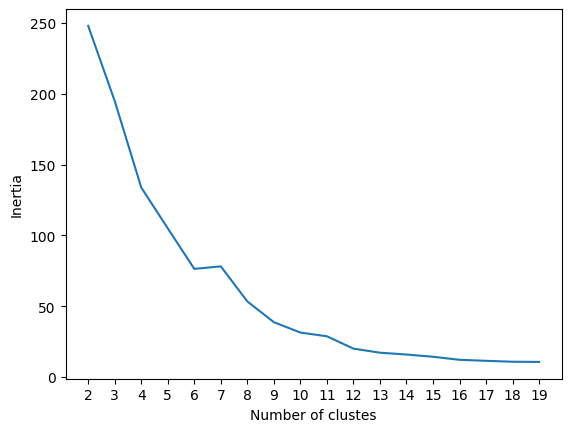

In [36]:
elbow_scores=pd.DataFrame({"K":range(2,20),"Inertia":inertia_values})
sns.lineplot(data=elbow_scores,x="K",y="Inertia")
plt.xlabel("Number of clustes")
plt.ylabel("Inertia")
plt.xticks(range(2,20))
plt.show()

# Elbow point observed to be between 5,6 and 7

# 6-Cluster model

In [37]:
kmeans_model_6=KMeans(n_clusters=6)
kmeans_model_6.fit(pca_data_train)

KMeans(n_clusters=6)

In [38]:
pca_data_train

PC1       PC2
0   0.732307  0.278651
1  -0.378193 -2.023648
2   0.013469 -0.713336
3  -1.152673  2.109208
4   1.537550 -0.333274
..       ...       ...
81 -4.281925 -3.567845
82  0.098695 -1.156904
83 -1.934122 -0.334256
84  1.358260 -0.801065
85  1.315844 -0.936165

[86 rows x 2 columns]

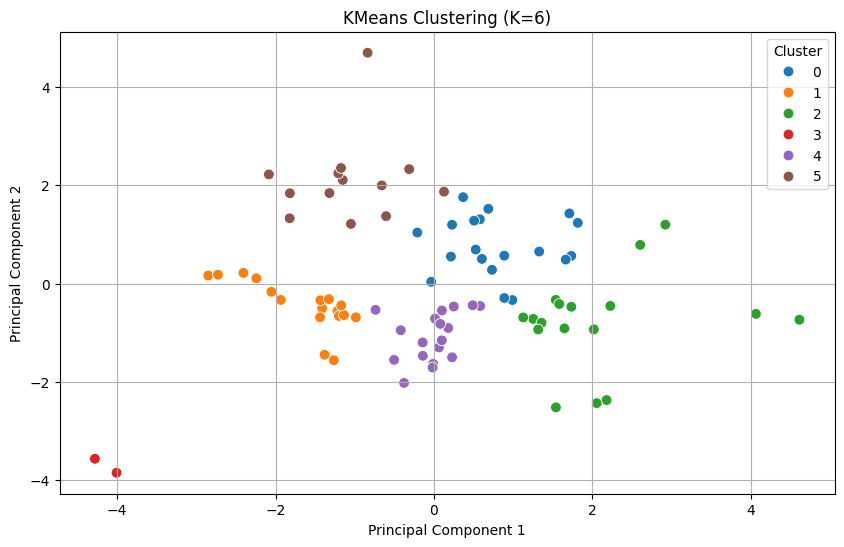

In [39]:
##plot showing clusters for train data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_train, x='PC1', y='PC2', hue=kmeans_model_6.labels_, palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={6})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [40]:
#pca_data_test=pca_data_test.drop(columns=["cluster"])
pca_data_test

PC1       PC2
86  -0.030875  0.922924
87  -1.278080  1.121180
88   1.081811  0.893612
89   0.080637  1.068765
90  -0.975990 -1.332075
91   1.509570  1.807969
92  -3.728592 -3.592803
93   0.067881 -0.466803
94   0.746034  0.078337
95  -0.118291  1.197348
96   0.041630 -2.280094
97  -1.012404  4.457901
98   0.363106 -2.496885
99  -1.204313  4.878476
100  2.613932  1.107993
101  0.306871 -1.513407
102 -1.247315 -0.738037
103  0.169585  1.001822
104 -2.102698  2.395347
105  3.787550 -0.741049
106 -0.322685 -0.863335
107  0.921485 -0.864294

In [41]:
predicted_val=kmeans_model_6.predict(pca_data_test)
pca_data_test["cluster"]=predicted_val
score=silhouette_score(pca_data_test,predicted_val)
inertia_values.append(kmeans_model_6.inertia_)

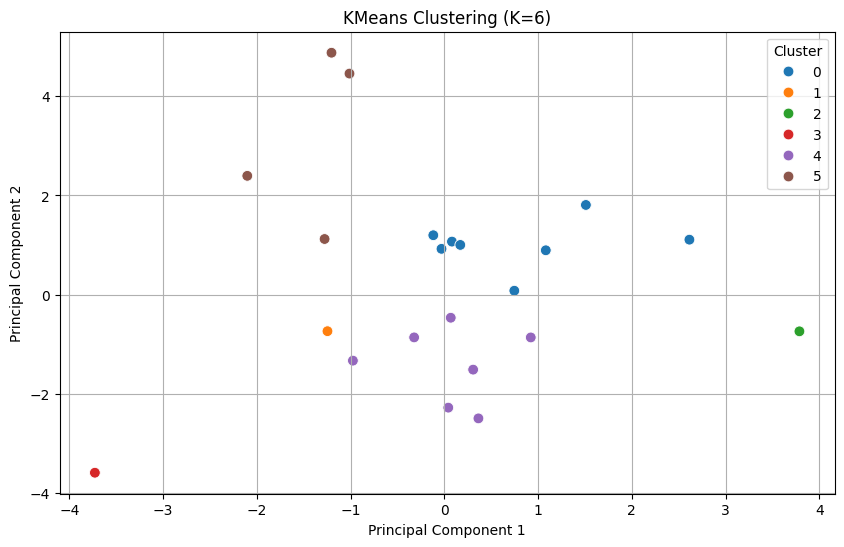

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_test, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={6})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [43]:
predicted_val=kmeans_model_6.predict(pca_data)
pca_data1=pd.DataFrame(pca_data)
pca_data1["cluster"]=predicted_val
score=silhouette_score(pca_data1,predicted_val)
inertia_values.append(kmeans_model.inertia_)

print(f"Sillouhette score {score}")

Sillouhette score 0.622283756167702


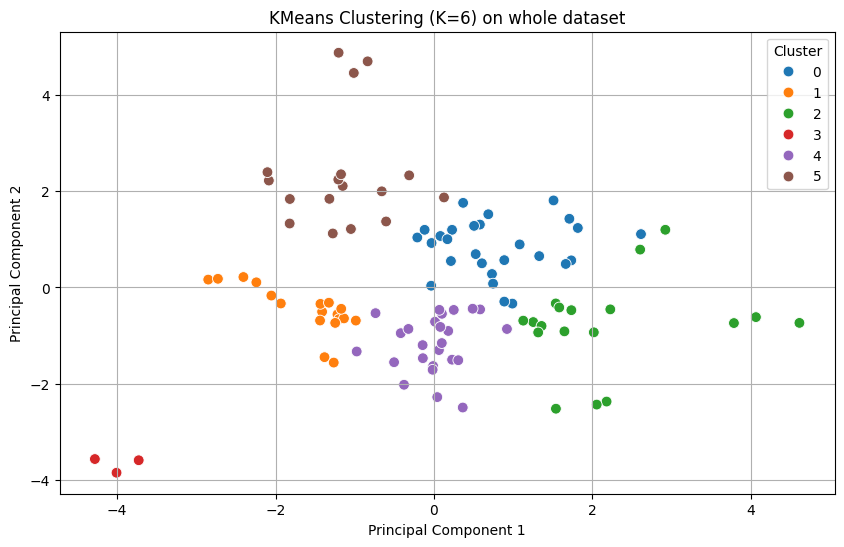

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data1, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={6}) on whole dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 5 Component cluster

In [45]:
k=5
kmeans_model_5=KMeans(n_clusters=k)
kmeans_model_5.fit(pca_data_train)

KMeans(n_clusters=5)

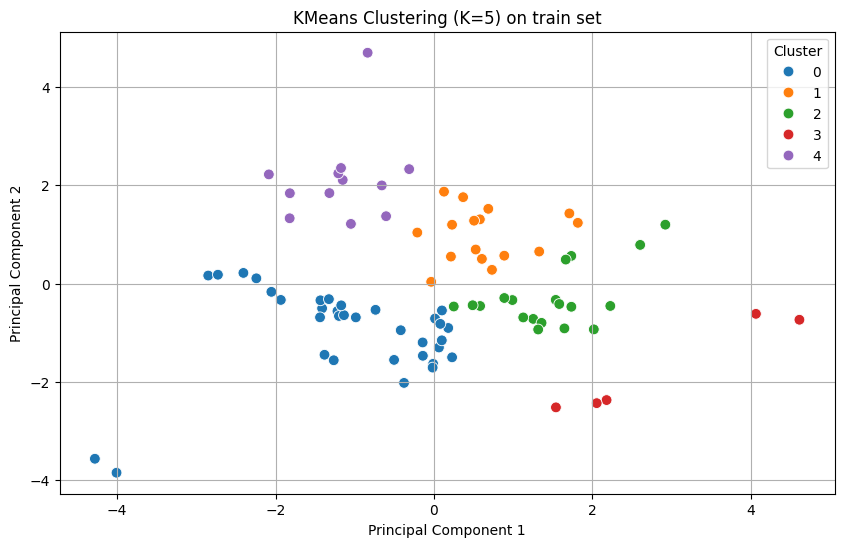

In [46]:
##kmean clusterring on train data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_train, x='PC1', y='PC2', hue=kmeans_model_5.labels_, palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on train set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [47]:
pca_data_test=pca_data_test.drop(columns=["cluster"])
pca_data_test

PC1       PC2
86  -0.030875  0.922924
87  -1.278080  1.121180
88   1.081811  0.893612
89   0.080637  1.068765
90  -0.975990 -1.332075
91   1.509570  1.807969
92  -3.728592 -3.592803
93   0.067881 -0.466803
94   0.746034  0.078337
95  -0.118291  1.197348
96   0.041630 -2.280094
97  -1.012404  4.457901
98   0.363106 -2.496885
99  -1.204313  4.878476
100  2.613932  1.107993
101  0.306871 -1.513407
102 -1.247315 -0.738037
103  0.169585  1.001822
104 -2.102698  2.395347
105  3.787550 -0.741049
106 -0.322685 -0.863335
107  0.921485 -0.864294

In [48]:
predicted_val=kmeans_model_5.predict(pca_data_test)
pca_data_test["cluster"]=predicted_val
score=silhouette_score(pca_data_test,predicted_val)
inertia_values.append(kmeans_model_5.inertia_)

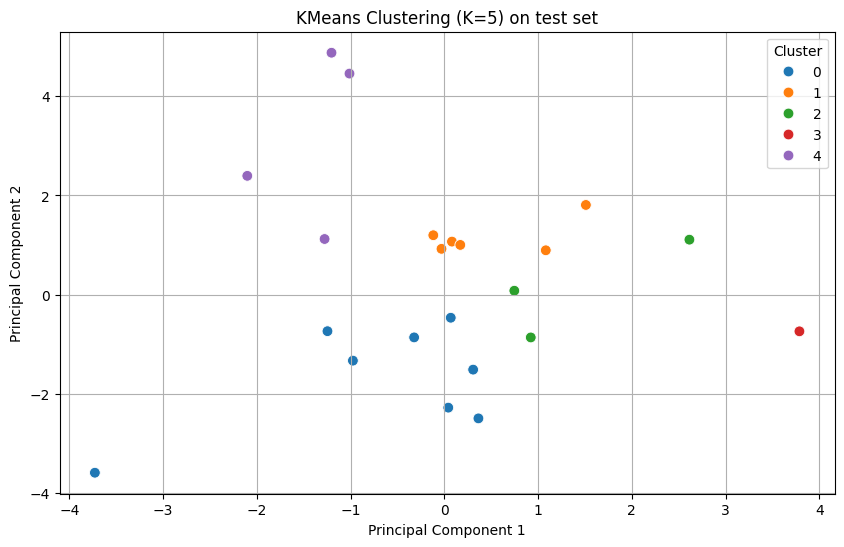

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_test, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on test set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [50]:
predicted_val=kmeans_model_5.predict(pca_data)
pca_data1=pd.DataFrame(pca_data)
pca_data1["cluster"]=predicted_val
score=silhouette_score(pca_data1,predicted_val)
inertia_values.append(kmeans_model_5.inertia_)

print(f"Sillouhette score {score}")

Sillouhette score 0.47343231091188015


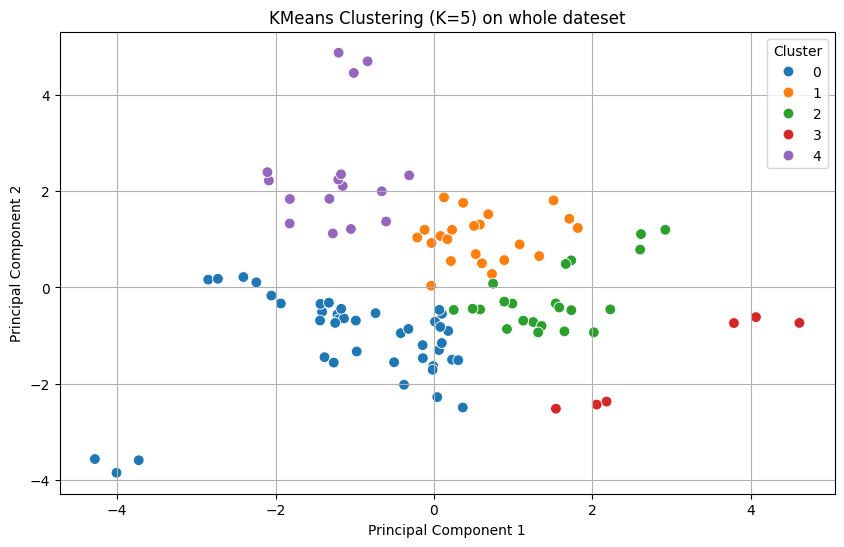

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data1, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on whole dateset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 7 Component cluster

In [52]:
k=7
kmeans_model_7=KMeans(n_clusters=k)
kmeans_model_7.fit(pca_data_train)

KMeans(n_clusters=7)

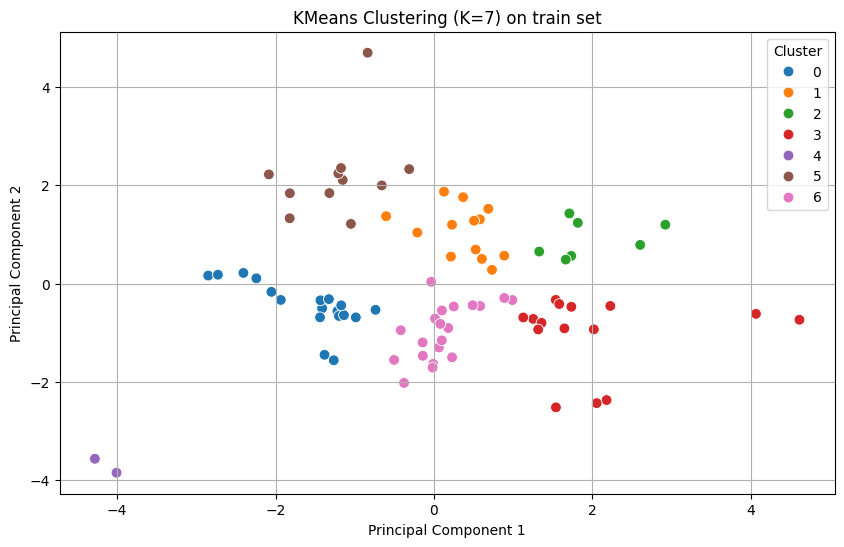

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_train, x='PC1', y='PC2', hue=kmeans_model_7.labels_, palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on train set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [54]:
pca_data_test=pca_data_test.drop(columns=["cluster"])
pca_data_test

PC1       PC2
86  -0.030875  0.922924
87  -1.278080  1.121180
88   1.081811  0.893612
89   0.080637  1.068765
90  -0.975990 -1.332075
91   1.509570  1.807969
92  -3.728592 -3.592803
93   0.067881 -0.466803
94   0.746034  0.078337
95  -0.118291  1.197348
96   0.041630 -2.280094
97  -1.012404  4.457901
98   0.363106 -2.496885
99  -1.204313  4.878476
100  2.613932  1.107993
101  0.306871 -1.513407
102 -1.247315 -0.738037
103  0.169585  1.001822
104 -2.102698  2.395347
105  3.787550 -0.741049
106 -0.322685 -0.863335
107  0.921485 -0.864294

In [55]:
predicted_val=kmeans_model_7.predict(pca_data_test)
pca_data_test["cluster"]=predicted_val
score=silhouette_score(pca_data_test,predicted_val)
inertia_values.append(kmeans_model_7.inertia_)

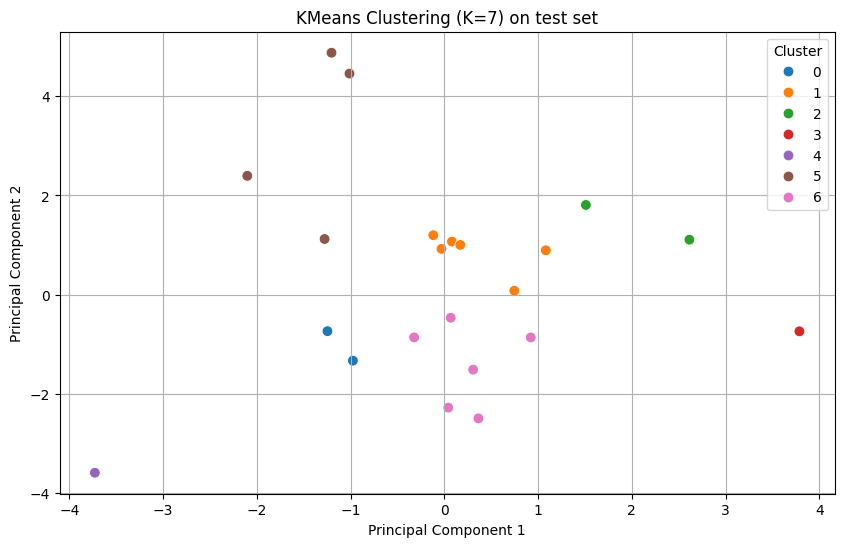

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data_test, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={7}) on test set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [57]:
predicted_val=kmeans_model_7.predict(pca_data)
pca_data1=pd.DataFrame(pca_data)
pca_data1["cluster"]=predicted_val
score=silhouette_score(pca_data1,predicted_val)
inertia_values.append(kmeans_model_7.inertia_)

print(f"Sillouhette score {score}")

Sillouhette score 0.6197680070297708


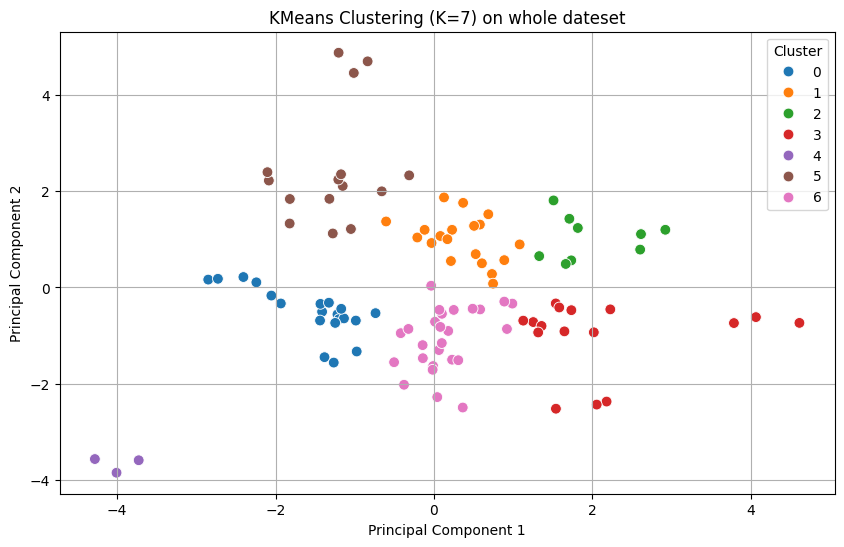

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_data1, x='PC1', y='PC2', hue='cluster', palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on whole dateset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **6 Clusters on Tsne-2 data**

In [59]:
#applying TSNE on whole dataSet
from sklearn.manifold import TSNE
import pandas as pd

tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
tsne_data = pd.DataFrame(tsne.fit_transform(data_v2), columns=["PC1", "PC2"]).astype('float64')



In [60]:
k=6
kmeans_model_6_tsne=KMeans(n_clusters=k)
kmeans_model_6_tsne.fit(tsne_data)
predicted_val=kmeans_model_6_tsne.predict(tsne_data)
score=silhouette_score(pca_data1,predicted_val)
print(f"Inertia value for tsne-2 data is {kmeans_model_6_tsne.inertia_}")
print(f"Sillouhette score {score}")

Inertia value for tsne-2 data is 835.1798653844653
Sillouhette score 0.010082183180322361


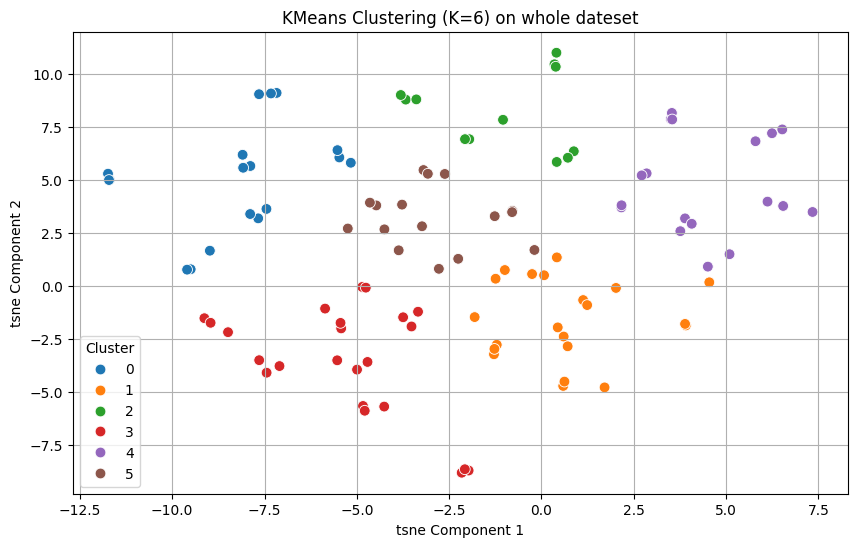

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_data, x='PC1', y='PC2', hue=predicted_val, palette='tab10', s=60)
plt.title(f'KMeans Clustering (K={k}) on whole dateset')
plt.xlabel('tsne Component 1')
plt.ylabel('tsne Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# **Evaluating Clustering models that have been made so far**



*   5-Cluster Model on PCA-2
*   6-Cluster Model on PCA-2
*   7-Cluster Model on PCA-3
*   6-Cluster Model on TSNE dataset

## Evaluation criterion used
*   Silhoutte Scores
*   David Bouldin score
*   Calinski harabasz score








In [62]:
pca_data
pca_data=pca_data.astype('double')
pca_data.dtypes

PC1    float64
PC2    float64
dtype: object

In [63]:
models=[kmeans_model_5,kmeans_model_6,kmeans_model_7,kmeans_model_6_tsne]
models_name=['5-Cluster Model','6-Cluster Model','7-Cluster-Model','6-Cluster-tSNE model']
silhouette_scores=[]
davies_bouldin_scores=[]
calinski_harabasz_scores=[]
adjusted_rand_scores=[]
data_clustered=pd.DataFrame(data_v2)

for model in models:
  # print(silhouette_scores)
  labels=model.predict(pca_data)
  silhouette_scores.append(silhouette_score(pca_data,labels))
  davies_bouldin_scores.append(davies_bouldin_score(pca_data,labels))
  calinski_harabasz_scores.append(calinski_harabasz_score(pca_data,labels))
  data_clustered[f"cluster_label_{str(models_name[models.index(model)])}"]=labels

metrics=pd.DataFrame({
    "Silhoutte Score":silhouette_scores,
    "David Bouldin Score":davies_bouldin_scores,
    "Calinski Harabasz Score":calinski_harabasz_scores
    })
metrics.index=models_name
metrics

Silhoutte Score  David Bouldin Score  \
5-Cluster Model              0.337722             0.944125   
6-Cluster Model              0.396982             0.734635   
7-Cluster-Model              0.411781             0.730251   
6-Cluster-tSNE model         0.392959             0.724565   

                      Calinski Harabasz Score  
5-Cluster Model                     55.428208  
6-Cluster Model                     83.038014  
7-Cluster-Model                     85.702262  
6-Cluster-tSNE model                43.938290

# Visualizing performance metrics of clustering

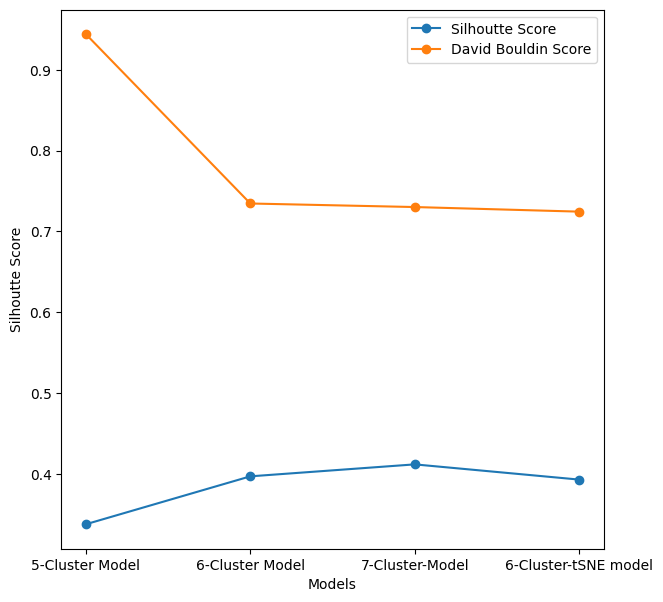

In [64]:
plt.figure(figsize=(7, 7))
plt.plot(metrics.index,metrics["Silhoutte Score"],label="Silhoutte Score",marker='o')
plt.plot(metrics.index,metrics["David Bouldin Score"],label="David Bouldin Score",marker='o')
plt.xlabel('Models')
plt.ylabel('Silhoutte Score')
plt.legend()
plt.show()

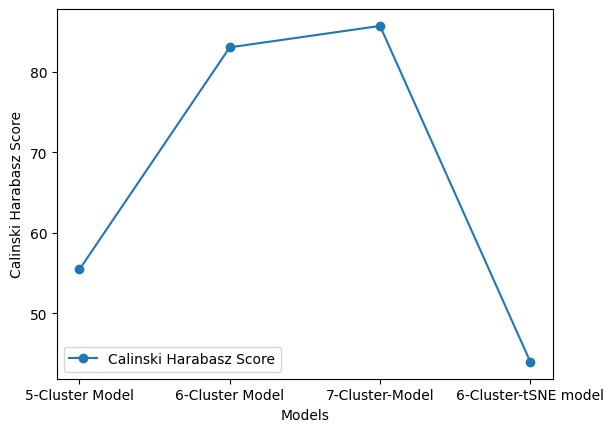

In [65]:
plt.plot(metrics.index,metrics["Calinski Harabasz Score"],label="Calinski Harabasz Score",marker='o')
plt.xlabel('Models')
plt.ylabel('Calinski Harabasz Score')
plt.legend()
plt.show()

In [66]:
data_clustered

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
0             0.177164            -0.731058               -0.072110   
1            -1.788630            -0.646145               -0.705770   
2             0.734139             0.252936               -0.644448   
3             0.177164            -0.206594               -0.991938   
4            -0.248758             1.531628               -0.848854   
..                 ...                  ...                     ...   
103          -1.952446             3.199922                0.357143   
104           1.094535             0.752425                0.316262   
105           0.078874             0.168023                0.745515   
106           0.734139             0.552629               -0.991938   
107          -1.100602             0.053140               -0.051669   

     Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0      -0.188523                                 0.690705        -0.891630   
1      -0.607499                                 0.004383         1.110878   
2       0.052705                                 0.039882        -0.751103   
3      -1.331185                                 0.844535        -0.997025   
4       1.343489                                 0.607873         1.251405   
..           ...                                      ...              ...   
103     0.784855                                 2.382843         1.778380   
104    -1.322721                                -0.267779        -0.751103   
105     2.697754                                 0.110881         0.759561   
106    -0.772550                                -0.492609         1.040614   
107    -0.116578                                 0.891868        -0.821366   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0           0.590306                 -1.175971                  -0.349841   
1          -0.167656                  1.016621                  -0.189829   
2          -0.925618                 -1.010492                  -0.029817   
3           0.506088                 -1.051862                   3.390443   
4          -0.251874                  1.471688                  -0.829878   
..               ...                       ...                        ...   
103        -0.925618                  1.513057                  -0.829878   
104         0.674524                 -1.010492                  -0.169828   
105        -1.009836                  0.478816                   0.370213   
106        -1.094054                 -1.548298                  -0.009816   
107        -0.336092                  0.230598                  -0.629863   

     Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0                 0.353251                         0.942116   
1                 0.802088                        -1.712383   
2                -0.095586                        -0.049316   
3                 0.802088                         1.459208   
4                 1.250924                        -0.392046   
..                     ...                              ...   
103              -0.544422                         0.067351   
104               1.250924                         1.003087   
105               1.250924                        -1.055850   
106               0.802088                        -1.019811   
107              -0.095586                        -1.016535   

     Number of Seeds per Pod (NSP)  Protein Content (PCO)    C         S  \
0                        -0.651063               1.086519 -1.0 -1.167315   
1                        -0.610395              -1.313226  1.0  1.234019   
2                         0.080959              -1.243668  1.0 -1.167315   
3                         0.731646              -1.278447 -1.0 -1.167315   
4                        -0.569727               0.321383 -1.0  0.033352   
..                             ...                    ...  ...       ...   
1

In [67]:
params=data_clustered.columns[:16]
params

Index(['Plant Height (PH)', 'Number of Pods (NP)', 'Biological Weight (BW)',
       'Sugars (Su)', 'Relative Water Content in Leaves (RWCL)',
       'ChlorophyllA663', 'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)', 'C', 'S', 'G'],
      dtype='object')

In [68]:
data_clustered.corrwith(data_clustered["cluster_label_6-Cluster Model"])

Plant Height (PH)                          0.256455
Number of Pods (NP)                       -0.172986
Biological Weight (BW)                    -0.144290
Sugars (Su)                               -0.041618
Relative Water Content in Leaves (RWCL)   -0.004374
ChlorophyllA663                           -0.104241
Chlorophyllb649                            0.129026
Protein Percentage (PPE)                  -0.160387
Weight of 300 Seeds (W3S)                  0.122684
Leaf Area Index (LAI)                      0.011603
Seed Yield per Unit Area (SYUA)            0.097878
Number of Seeds per Pod (NSP)              0.189108
Protein Content (PCO)                     -0.303315
C                                         -0.039885
S                                          0.160957
G                                         -0.207267
cluster_label_5-Cluster Model              0.355606
cluster_label_6-Cluster Model              1.000000
cluster_label_7-Cluster-Model              0.707802
cluster_label_6-Cluster-tSNE model         0.524720
dtype: float64

In [69]:
data_v1.columns

Index(['Plant Height (PH)', 'Number of Pods (NP)', 'Biological Weight (BW)',
       'Sugars (Su)', 'Relative Water Content in Leaves (RWCL)',
       'ChlorophyllA663', 'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)', 'C', 'S', 'G'],
      dtype='object')

In [70]:
X=data_v2.iloc[:,:-3]
X.head()

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
0           0.177164            -0.731058               -0.072110   
1          -1.788630            -0.646145               -0.705770   
2           0.734139             0.252936               -0.644448   
3           0.177164            -0.206594               -0.991938   
4          -0.248758             1.531628               -0.848854   

   Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0    -0.188523                                 0.690705        -0.891630   
1    -0.607499                                 0.004383         1.110878   
2     0.052705                                 0.039882        -0.751103   
3    -1.331185                                 0.844535        -0.997025   
4     1.343489                                 0.607873         1.251405   

   Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0         0.590306                 -1.175971                  -0.349841   
1        -0.167656                  1.016621                  -0.189829   
2        -0.925618                 -1.010492                  -0.029817   
3         0.506088                 -1.051862                   3.390443   
4        -0.251874                  1.471688                  -0.829878   

   Leaf Area Index (LAI)  Seed Yield per Unit Area (SYUA)  \
0               0.353251                         0.942116   
1               0.802088                        -1.712383   
2              -0.095586                        -0.049316   
3               0.802088                         1.459208   
4               1.250924                        -0.392046   

   Number of Seeds per Pod (NSP)  Protein Content (PCO)  
0                      -0.651063               1.086519  
1                      -0.610395              -1.313226  
2                       0.080959              -1.243668  
3                       0.731646              -1.278447  
4                      -0.569727               0.321383

**KMeans with only output parameters**

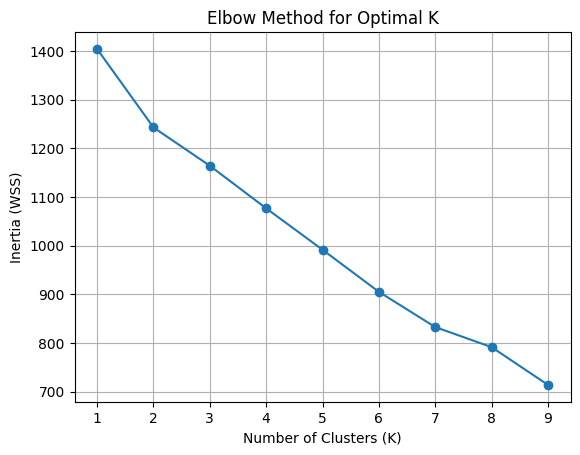

In [71]:
#All the columns except partameters
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["pca1","pca2"])
inertia = []
K = range(1,10)

for k in K:
#Training on the standardised data (output attributes only)
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

K= 2
Inertia: 1242.8263424156792
Silhouette Score: 0.10569580471842865
calinski_harabasz_score: 0.10569580471842865
Davies-Bouldin Index: 2.644451585672726


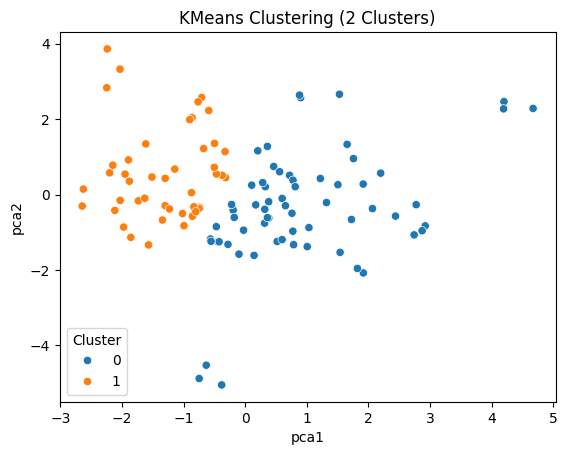

K= 3
Inertia: 1164.1182272586923
Silhouette Score: 0.07946292346291094
calinski_harabasz_score: 0.07946292346291094
Davies-Bouldin Index: 2.4111639521577453


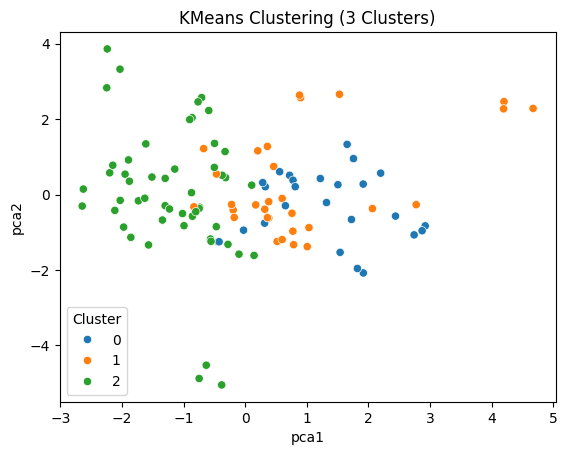

K= 4
Inertia: 1076.6117415556084
Silhouette Score: 0.09823005746532988
calinski_harabasz_score: 0.09823005746532988
Davies-Bouldin Index: 2.0652498902205965


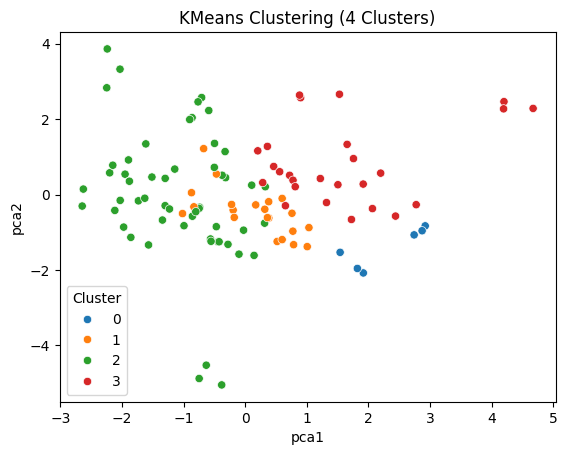

K= 5
Inertia: 991.5873384372263
Silhouette Score: 0.11173170860072278
calinski_harabasz_score: 0.11173170860072278
Davies-Bouldin Index: 2.0070611430592984


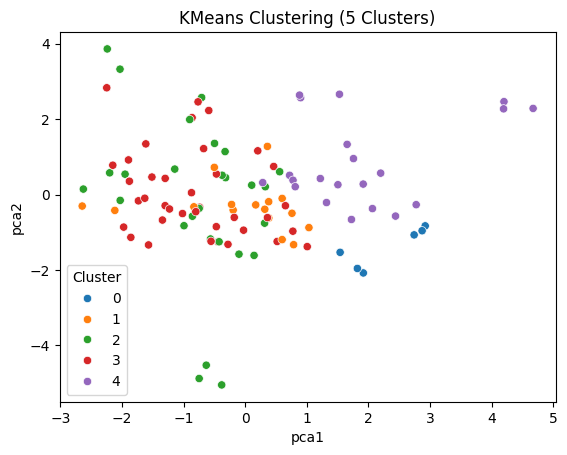

K= 6
Inertia: 905.1013221720493
Silhouette Score: 0.12622727381354565
calinski_harabasz_score: 0.12622727381354565
Davies-Bouldin Index: 1.866985392360273


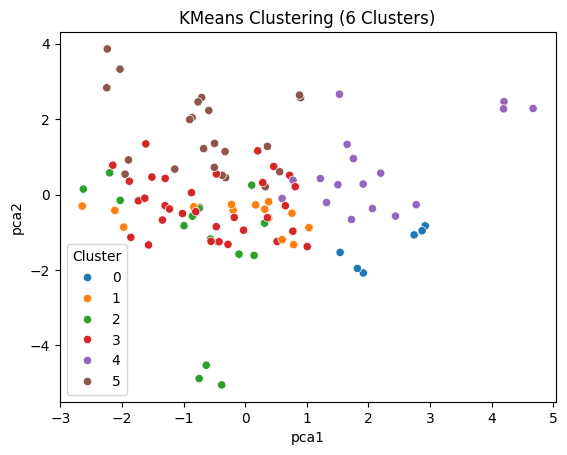

In [72]:
ch_lst=[]
dbi_lst=[]
sil_lst=[]
for k in range(2,7):
  print("K=",k)
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)

  # Add cluster labels to the original DataFrame
  labels= kmeans.labels_

  # Print the result
  print("Inertia:", kmeans.inertia_)
  score = silhouette_score(X, kmeans.labels_)
  sil_lst.append(score)
  print("Silhouette Score:", score)
  s = calinski_harabasz_score(X, labels)
  ch_lst.append(s)
  print("calinski_harabasz_score:", score)
  dbi = davies_bouldin_score(X, labels)
  dbi_lst.append(dbi)
  print(f"Davies-Bouldin Index: {dbi}")
  # Visualize the clusters
  sns.scatterplot(x=X_pca["pca1"],y=X_pca["pca2"],hue=labels,palette='tab10')
  plt.xlabel('pca1')
  plt.ylabel('pca2')
  plt.legend(title='Cluster')
  plt.title(f'KMeans Clustering ({k} Clusters)')
  plt.show()

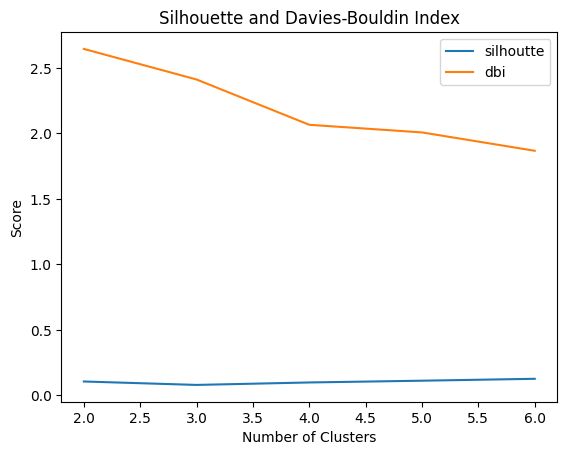

In [73]:
plt.plot(range(2, 7), sil_lst, label="silhoutte")
plt.plot(range(2, 7), dbi_lst, label="dbi")
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.title('Silhouette and Davies-Bouldin Index')
plt.show()



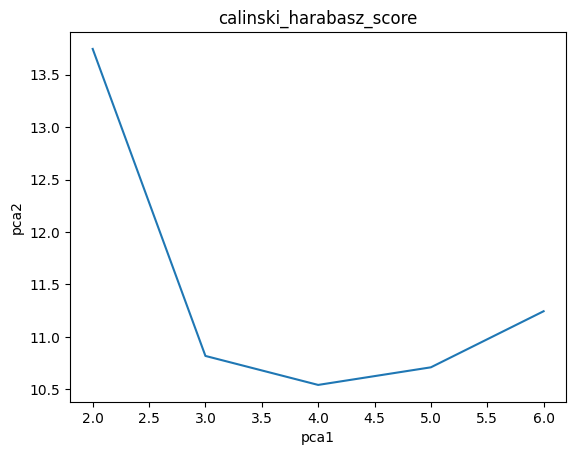

In [74]:

plt.plot(range(2,7),ch_lst)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('calinski_harabasz_score')
plt.show()


In [75]:
print(f"dbi scores:\n {dbi_lst}")
print(f"silhouette score:\n {sil_lst}")
print(f"calinski harbasz score:\n {ch_lst}")

dbi scores:
 [np.float64(2.644451585672726), np.float64(2.4111639521577453), np.float64(2.0652498902205965), np.float64(2.0070611430592984), np.float64(1.866985392360273)]
silhouette score:
 [np.float64(0.10569580471842865), np.float64(0.07946292346291094), np.float64(0.09823005746532988), np.float64(0.11173170860072278), np.float64(0.12622727381354565)]
calinski harbasz score:
 [np.float64(13.746415827275587), np.float64(10.818311039227495), np.float64(10.54183155170988), np.float64(10.709723312903838), np.float64(11.244633919290157)]


# **k = 2, based on highest silhouette/calinski harabasz scores and stable dbi score**

K= 2
Inertia: 1242.8263424156792
Silhouette Score: 0.10569580471842865
calinski_harabasz_score: 13.746415827275587
Davies-Bouldin Index: 2.644451585672726


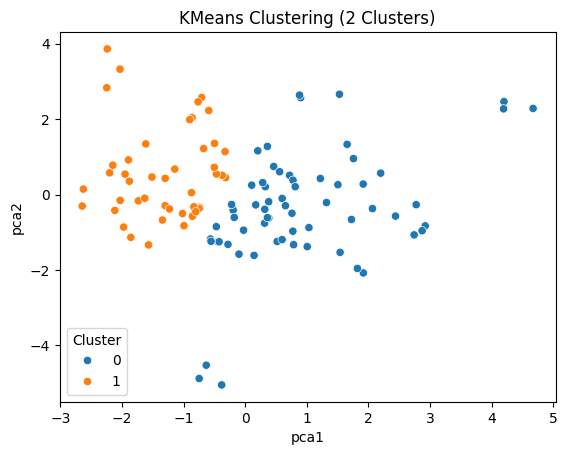

In [76]:
k=2
print(f"K= {k}")
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

  # Add cluster labels to the original DataFrame
labels= kmeans.labels_

  # Print the result
print("Inertia:", kmeans.inertia_)
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)
s = calinski_harabasz_score(X, labels)
print("calinski_harabasz_score:", s)
dbi = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi}")
  # Visualize the clusters
sns.scatterplot(x=X_pca["pca1"],y=X_pca["pca2"],hue=labels,palette='tab10')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(title='Cluster')
plt.title(f'KMeans Clustering ({k} Clusters)')
plt.show()

In [77]:
data_clustered["output_labels(2)"]=labels

In [78]:
data_clustered

Plant Height (PH)  Number of Pods (NP)  Biological Weight (BW)  \
0             0.177164            -0.731058               -0.072110   
1            -1.788630            -0.646145               -0.705770   
2             0.734139             0.252936               -0.644448   
3             0.177164            -0.206594               -0.991938   
4            -0.248758             1.531628               -0.848854   
..                 ...                  ...                     ...   
103          -1.952446             3.199922                0.357143   
104           1.094535             0.752425                0.316262   
105           0.078874             0.168023                0.745515   
106           0.734139             0.552629               -0.991938   
107          -1.100602             0.053140               -0.051669   

     Sugars (Su)  Relative Water Content in Leaves (RWCL)  ChlorophyllA663  \
0      -0.188523                                 0.690705        -0.891630   
1      -0.607499                                 0.004383         1.110878   
2       0.052705                                 0.039882        -0.751103   
3      -1.331185                                 0.844535        -0.997025   
4       1.343489                                 0.607873         1.251405   
..           ...                                      ...              ...   
103     0.784855                                 2.382843         1.778380   
104    -1.322721                                -0.267779        -0.751103   
105     2.697754                                 0.110881         0.759561   
106    -0.772550                                -0.492609         1.040614   
107    -0.116578                                 0.891868        -0.821366   

     Chlorophyllb649  Protein Percentage (PPE)  Weight of 300 Seeds (W3S)  \
0           0.590306                 -1.175971                  -0.349841   
1          -0.167656                  1.016621                  -0.189829   
2          -0.925618                 -1.010492                  -0.029817   
3           0.506088                 -1.051862                   3.390443   
4          -0.251874                  1.471688                  -0.829878   
..               ...                       ...                        ...   
103        -0.925618                  1.513057                  -0.829878   
104         0.674524                 -1.010492                  -0.169828   
105        -1.009836                  0.478816                   0.370213   
106        -1.094054                 -1.548298                  -0.009816   
107        -0.336092                  0.230598                  -0.629863   

     Leaf Area Index (LAI)  ...  Number of Seeds per Pod (NSP)  \
0                 0.353251  ...                      -0.651063   
1                 0.802088  ...                      -0.610395   
2                -0.095586  ...                       0.080959   
3                 0.802088  ...                       0.731646   
4                 1.250924  ...                      -0.569727   
..                     ...  ...                            ...   
103              -0.544422  ...                       2.358363   
104               1.250924  ...                       2.358363   
105               1.250924  ...                      -0.895071   
106               0.802088  ...                       0.324967   
107              -0.095586  ...                      -0.488392   

     Protein Content (PCO)    C         S        G  \
0                 1.086519 -1.0 -1.167315  0.87831   
1                -1.313226  1.0  1.234019  0.29277   
2                -1.243668  1.0 -1.167315  1.46385   
3                -1.278447 -1.0 -1.167315 -1.46385   
4                 0.321383 -1.0  0.033352  1.46385   
..                     ...  ...       ...      ...   
103              -0.652427 -1.0  0.033352 -0.29277   
104              -0.513311 -1.0  1.234019 -0.87831   
105        

In [79]:
data_clustered.corrwith(data_clustered["output_labels(2)"])

Plant Height (PH)                         -0.527135
Number of Pods (NP)                        0.004479
Biological Weight (BW)                    -0.202987
Sugars (Su)                                0.589881
Relative Water Content in Leaves (RWCL)    0.076377
ChlorophyllA663                            0.232860
Chlorophyllb649                           -0.304612
Protein Percentage (PPE)                   0.067467
Weight of 300 Seeds (W3S)                 -0.172832
Leaf Area Index (LAI)                      0.290122
Seed Yield per Unit Area (SYUA)           -0.523275
Number of Seeds per Pod (NSP)             -0.463177
Protein Content (PCO)                      0.255942
C                                         -0.056344
S                                         -0.287512
G                                         -0.093476
cluster_label_5-Cluster Model              0.030903
cluster_label_6-Cluster Model             -0.033709
cluster_label_7-Cluster-Model              0.299178
cluster_label_6-Cluster-tSNE model        -0.442981
output_labels(2)                           1.000000
dtype: float64

**soft clusters(without parameters)**

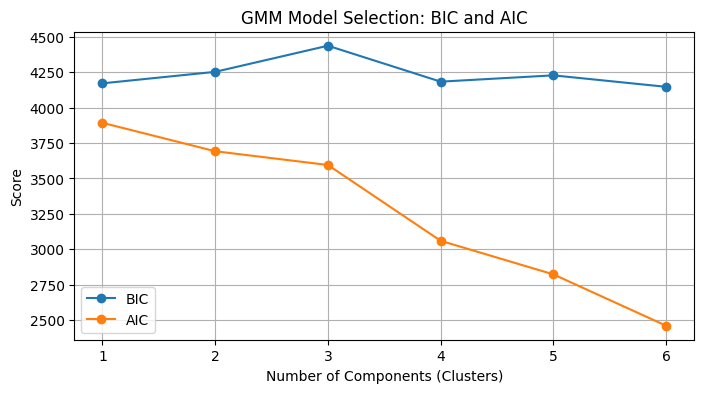

In [83]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

K= range(1, 7)
bics = []
aics = []

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

# Plot BIC and AIC(lower the better )
plt.figure(figsize=(8, 4))
plt.plot(K, bics, label='BIC', marker='o')
plt.plot(K, aics, label='AIC', marker='o')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Score')
plt.title('GMM Model Selection: BIC and AIC')
plt.legend()
plt.grid(True)
plt.show()


In [86]:
##BIC is almost stable and AIC is min for 6
k=6
gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
gmm.fit(X)
labels=gmm.predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)
s = calinski_harabasz_score(X, labels)
print("calinski_harabasz_score:", s)
dbi = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi}")

Silhouette Score: 0.12321536840081375
calinski_harabasz_score: 10.982223861617992
Davies-Bouldin Index: 1.908722913863887


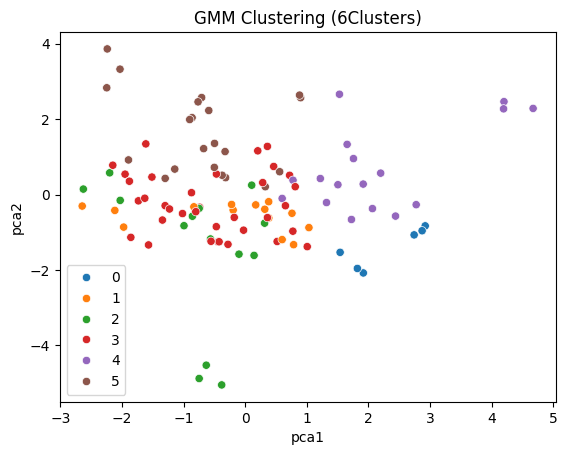

In [87]:
sns.scatterplot(x=X_pca["pca1"],y=X_pca["pca2"],hue=labels,palette="tab10")
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.title(f'GMM Clustering ({k}Clusters)')
plt.show()

In [89]:
data_clustered["GMM_cluster_output(6)"]=labels

In [90]:
data_clustered.corrwith(data_clustered["GMM_cluster_output(6)"])

Plant Height (PH)                         -0.161950
Number of Pods (NP)                        0.289114
Biological Weight (BW)                     0.405416
Sugars (Su)                                0.355356
Relative Water Content in Leaves (RWCL)   -0.243466
ChlorophyllA663                           -0.022089
Chlorophyllb649                           -0.124278
Protein Percentage (PPE)                   0.065587
Weight of 300 Seeds (W3S)                 -0.182483
Leaf Area Index (LAI)                      0.335806
Seed Yield per Unit Area (SYUA)            0.236639
Number of Seeds per Pod (NSP)             -0.148195
Protein Content (PCO)                      0.602362
C                                         -0.349794
S                                         -0.199175
G                                         -0.061445
cluster_label_5-Cluster Model              0.381709
cluster_label_6-Cluster Model             -0.257212
cluster_label_7-Cluster-Model             -0.080553
cluster_label_6-Cluster-tSNE model        -0.110005
output_labels(2)                           0.248329
GMM_cluster_output(6)                      1.000000
dtype: float64

**Soft clusters(all attributes)**

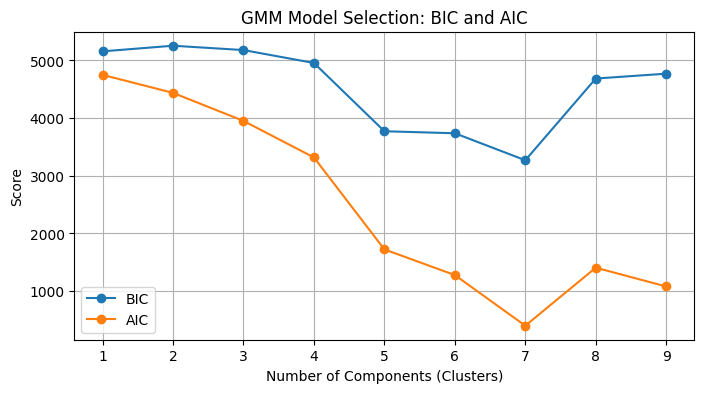

In [91]:

X=data_v2
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
X_pca=pd.DataFrame(X_pca,columns=["pca1","pca2"])
K= range(1, 10)
bics = []
aics = []

for k in K:
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(X)
    bics.append(gmm.bic(X))
    aics.append(gmm.aic(X))

# Plot BIC and AIC(lower the better )
plt.figure(figsize=(8, 4))
plt.plot(K, bics, label='BIC', marker='o')
plt.plot(K, aics, label='AIC', marker='o')
plt.xlabel('Number of Components (Clusters)')
plt.ylabel('Score')
plt.title('GMM Model Selection: BIC and AIC')
plt.legend()
plt.grid(True)
plt.show()



In [92]:
print(f"BIC: {bics}")
print(f"AIC: {aics}")

BIC: [np.float64(5157.669923849306), np.float64(5255.201051600523), np.float64(5179.650994086433), np.float64(4956.0583374310145), np.float64(3772.0464557628534), np.float64(3737.146484899704), np.float64(3269.128217992017), np.float64(4686.138862516266), np.float64(4770.337488431978)]
AIC: [np.float64(4749.985977326424), np.float64(4437.151027327635), np.float64(3951.2348920635395), np.float64(3317.276157658116), np.float64(1722.8981982399496), np.float64(1277.6321496267938), np.float64(399.2478049691017), np.float64(1405.8923717433452), np.float64(1079.7249199090516)]


In [94]:
optimal_k=7
gmm = GaussianMixture(n_components=optimal_k, covariance_type='full', random_state=42)
gmm.fit(X)
labels=gmm.predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)
s = calinski_harabasz_score(X, labels)
print("calinski_harabasz_score:", s)
dbi = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {dbi}")


Silhouette Score: 0.12715981128190645
calinski_harabasz_score: 9.689239573477467
Davies-Bouldin Index: 1.893435414502165


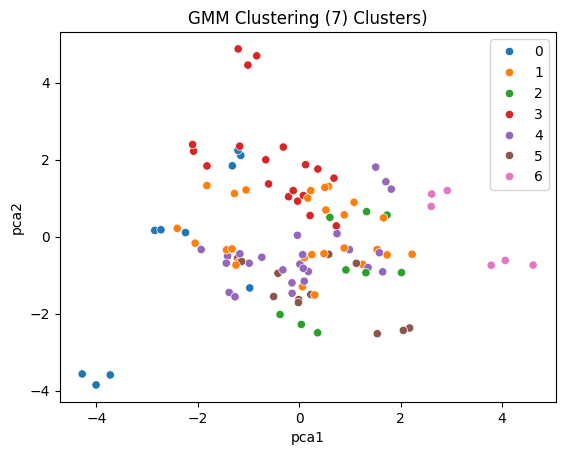

In [95]:
sns.scatterplot(x=X_pca["pca1"],y=X_pca["pca2"],hue=labels,palette="tab10")
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend()
plt.title(f'GMM Clustering ({optimal_k}) Clusters)')
plt.show()

In [96]:
data_clustered["GMM_cluster(whole)"]=labels
#data_clustered.head()

In [97]:
data_clustered.corrwith(data_clustered["GMM_cluster(whole)"])

Plant Height (PH)                          0.075127
Number of Pods (NP)                        0.076711
Biological Weight (BW)                    -0.041968
Sugars (Su)                                0.335893
Relative Water Content in Leaves (RWCL)   -0.359993
ChlorophyllA663                           -0.287594
Chlorophyllb649                           -0.226613
Protein Percentage (PPE)                  -0.317285
Weight of 300 Seeds (W3S)                  0.113198
Leaf Area Index (LAI)                      0.218378
Seed Yield per Unit Area (SYUA)           -0.122320
Number of Seeds per Pod (NSP)             -0.160122
Protein Content (PCO)                      0.484466
C                                          0.435850
S                                         -0.387519
G                                         -0.046684
cluster_label_5-Cluster Model              0.017353
cluster_label_6-Cluster Model             -0.012296
cluster_label_7-Cluster-Model              0.083807
cluster_label_6-Cluster-tSNE model        -0.335428
output_labels(2)                           0.127578
GMM_cluster_output(6)                      0.216415
GMM_cluster(whole)                         1.000000
dtype: float64